# 6CP Additional Project Assignment

Deadline: September 15th, end of day

```
Pawan Kumar: 224230
Raj Rajeshwari Prasad: 224237
Sesha Sai Kiran Bhavaraju:224160
```



# Task 1: Optimizers

In this task, you will investigate how different optimizers affect the training behavior.

Pick a architecture of your choice to train on Cifar10.
Train this architecture with different Optimizers and different hyperparameters.
Compare the training curves, e.g. regarding:

*   steps until convergence
*   training accuracy (or loss) when converged
*   stability of training (fluctuation of the curve)


Now choose a different architecture and/or data set and repeat the experiments.
Are the results (qualitatively) still the same? If they are different, discuss potential reasons.

Bonus: Do not only compare visually, but use meaningful quantitative measures for comparison.

## Optimizers- Unified Answers and Summary

TASK

* Motivation    : Analyze the affect of different Optimizers on the training behaviour
  
 * Optimizer 1: Adadelta,
 * Optimizer 2: Adagrad
 * Optimizer 3: Adam)
 * Optimizer 4: Adamax,
 * Optimizer 5: Ftrl,
 * Optimizer 6: Nadam,
 * Optimizer 7: SGD

* Dataset       :
 * Cifar10, 
 *MNIST Fashion

* Architecture  :
 * Basic Convolutional Neural Network
 * Resnet
 * InceptionNet

* Comparision Criteria : Training Curve
 * Steps unitll convergence
 * Training Accuracy 
 * Loss
 * Stability of Training

 ### Importing Dependencies(Libraries)

Major Libraries Used : TensorFlow, Keras, scikit-learn, matplotlib, NumPy

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Add,BatchNormalization

### Loading and Splitting Data

### Loading and Splitting CIFAR10 DATA into Train, Validation and Test 

In [ ]:
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Cifar10
(cifar_train_x_temp, cifar_train_y_temp), (cifar_test_x , cifar_test_y) =cifar10.load_data() 

#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data
cifar_train_x, cifar_val_x, cifar_train_y, cifar_val_y = train_test_split(cifar_train_x_temp, cifar_train_y_temp, test_size=0.20, random_state=42)

#Standardizing the dataset
cifar_train_x, cifar_val_x, cifar_test_x = cifar_train_x/255.0, cifar_val_x/255.0, cifar_test_x/255.0

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print('cifar10 train data      : {}'.format(cifar_train_x.shape))
print('cifar10 validation data : {}'.format(cifar_val_x.shape))
print('cifar10 test data       : {}'.format(cifar_test_x.shape))

cifar10 train data      : (40000, 32, 32, 3)
cifar10 validation data : (10000, 32, 32, 3)
cifar10 test data       : (10000, 32, 32, 3)


In [ ]:
#Standardizing the train dataset
#cifar_train_y = cifar_train_y.reshape((-1))
#cifar_train_x = tf.data.Dataset.from_tensor_slices((cifar_train_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_train_y.astype(np.int32)))

#Standardizing the validation dataset
#cifar_val_y = cifar_val_y.reshape((-1))
#cifar_val_x = tf.data.Dataset.from_tensor_slices((cifar_val_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_val_y.astype(np.int32)))

#Standardizing the test dataset
#cifar_test_y = cifar_test_y.reshape((-1))
#cifar_test_x = tf.data.Dataset.from_tensor_slices((cifar_test_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_test_y.astype(np.int32)))

### Defining and Training Models

#### TASK 1.1 Convolutional Neural Network

##### Basic CNN Model

In [ ]:
def cnn_basic_model(n,opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  cnn_model = models.Sequential()
  cnn_model.add(layers.Conv2D(8,(3,3),padding = 'SAME', activation='relu', input_shape = (32,32,3)))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(16,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(32,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(128,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.Flatten())
  cnn_model.add(layers.Dense(10))
  #cnn_model.summary()
  cnn_model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = cnn_model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = cnn_model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

##### Training on Cifar10 Data

###### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5638 - accuracy: 0.4345 - val_loss: 1.3966 - val_accuracy: 0.4972
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2389 - accuracy: 0.5584 - val_loss: 1.1840 - val_accuracy: 0.5766
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0798 - accuracy: 0.6185 - val_loss: 1.0816 - val_accuracy: 0.6178
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9707 - accuracy: 0.6597 - val_loss: 1.0119 - val_accuracy: 0.6436
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8824 - accuracy: 0.6908 - val_loss: 0.9805 - val_accuracy: 0.6579
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8085 - accuracy: 0.7153 - val_loss: 0.9485 - val_accuracy: 0.6727
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7468 - accuracy: 0.7380 - val_loss: 0.9251 - val_accuracy:

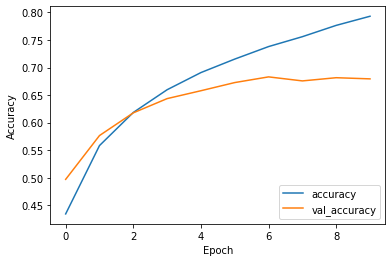

In [ ]:
opt_adam = cnn_basic_model('adam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1803 - accuracy: 0.1885 - val_loss: 2.0095 - val_accuracy: 0.2686
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8294 - accuracy: 0.3414 - val_loss: 1.6782 - val_accuracy: 0.3971
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6156 - accuracy: 0.4178 - val_loss: 1.6304 - val_accuracy: 0.4106
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4984 - accuracy: 0.4641 - val_loss: 1.4544 - val_accuracy: 0.4744
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4169 - accuracy: 0.4931 - val_loss: 1.3884 - val_accuracy: 0.5067
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3475 - accuracy: 0.5212 - val_loss: 1.3079 - val_accuracy: 0.5396
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2842 - accuracy: 0.5433 - val_loss: 1.3155 - val_accuracy:

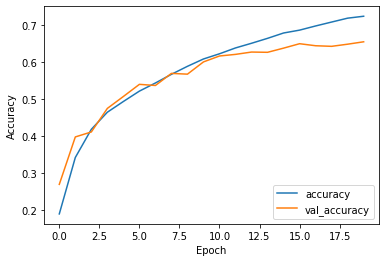

In [ ]:
opt_sgd =cnn_basic_model('sgd',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

######  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3040 - accuracy: 0.1026 - val_loss: 2.2998 - val_accuracy: 0.1046
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2982 - accuracy: 0.1339 - val_loss: 2.2951 - val_accuracy: 0.1426
Epoch 3/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2937 - accuracy: 0.1462 - val_loss: 2.2910 - val_accuracy: 0.1412
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2896 - accuracy: 0.1507 - val_loss: 2.2870 - val_accuracy: 0.1455
Epoch 5/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2854 - accuracy: 0.1530 - val_loss: 2.2828 - val_accuracy: 0.1516
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2810 - accuracy: 0.1543 - val_loss: 2.2784 - val_accuracy: 0.1617
Epoch 7/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2764 - accuracy: 0.1655 - val_loss: 2.2736 - val_ac

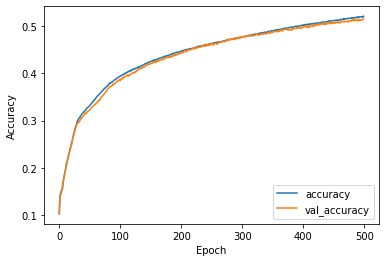

In [ ]:
opt_adadelta= cnn_basic_model('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2937 - accuracy: 0.1448 - val_loss: 2.2781 - val_accuracy: 0.1769
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2016 - accuracy: 0.2136 - val_loss: 2.0867 - val_accuracy: 0.2407
Epoch 3/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0414 - accuracy: 0.2656 - val_loss: 2.0079 - val_accuracy: 0.2732
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9968 - accuracy: 0.2849 - val_loss: 1.9792 - val_accuracy: 0.2852
Epoch 5/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9720 - accuracy: 0.2947 - val_loss: 1.9582 - val_accuracy: 0.2993
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9519 - accuracy: 0.3042 - val_loss: 1.9406 - val_accuracy: 0.3072
Epoch 7/500
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9339 - accuracy: 0.3138 - val_loss: 1.9238 - val_ac

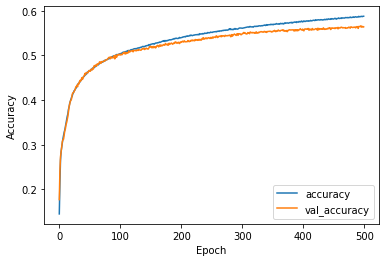

In [ ]:
opt_adagrad = cnn_basic_model('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7499 - accuracy: 0.3688 - val_loss: 1.5883 - val_accuracy: 0.4297
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5001 - accuracy: 0.4660 - val_loss: 1.4338 - val_accuracy: 0.4919
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3943 - accuracy: 0.5041 - val_loss: 1.3419 - val_accuracy: 0.5264
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3105 - accuracy: 0.5369 - val_loss: 1.3041 - val_accuracy: 0.5474
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2419 - accuracy: 0.5651 - val_loss: 1.2330 - val_accuracy: 0.5640
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1786 - accuracy: 0.5866 - val_loss: 1.1799 - val_accuracy: 0.5872
Epoch 7/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.1241 - accuracy: 0.6051 - val_loss: 1.1881 - val_accuracy:

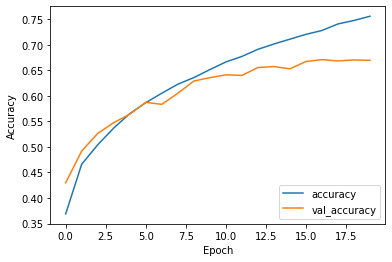

In [ ]:
opt_adamax = cnn_basic_model('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

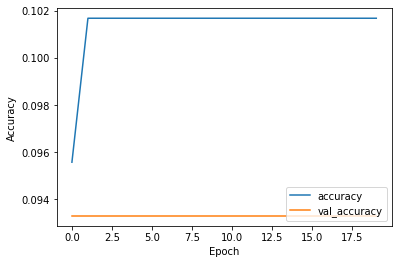

In [ ]:
opt_ftrl = cnn_basic_model('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Epoch 1/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5560 - accuracy: 0.4347 - val_loss: 1.3003 - val_accuracy: 0.5380
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2216 - accuracy: 0.5675 - val_loss: 1.1499 - val_accuracy: 0.5953
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0679 - accuracy: 0.6216 - val_loss: 1.0536 - val_accuracy: 0.6383
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9616 - accuracy: 0.6613 - val_loss: 1.0065 - val_accuracy: 0.6506
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8768 - accuracy: 0.6914 - val_loss: 0.9847 - val_accuracy: 0.6563
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8037 - accuracy: 0.7175 - val_loss: 0.9333 - val_accuracy: 0.6763
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7398 - accuracy: 0.7406 - val_loss: 0.9406 - val_accuracy:

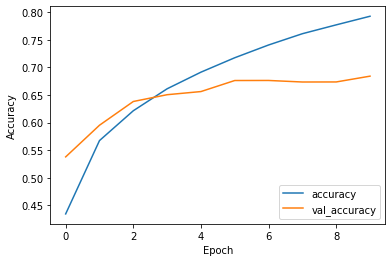

In [ ]:
opt_nadam = cnn_basic_model('Nadam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#### TASK 1.2  Residual Neural Netowrk

###### Resnet Model

In [ ]:
def resnet(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  # Input image shape = 32 x 32 x 3
  # Initial Block
  conv1 = tf.keras.layers.Conv2D(32,1,padding = 'SAME',activation='relu')(inputs) # shape = 32 x 32 x 16 
  conv1_pool = tf.keras.layers.MaxPool2D(2)(conv1) #shape = 32 x 32 x 16
  
  #Block 1
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv1_pool) # shape = 16 x 16 x 16
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv2) # shape = 16 x 16 x 16
  add1 = tf.keras.layers.Add()([conv1_pool,conv2,]) # shape = 16 x 16 x 16
  add1_relu = tf.keras.layers.Activation('relu')(add1) # shape = 16 x 16 x 16

  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(add1_relu) # shape = 16 x 16 x 16
  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv3) # shape = 16 x 16 x 16
  add2 = tf.keras.layers.Add()([add1_relu,conv3]) # shape = 16 x 16 x 16
  add2_relu = tf.keras.layers.Activation('relu')(add2) # shape = 16 x 16 x 16
  
  #Transition 1
  transition_conv1 = tf.keras.layers.Conv2D(64,1,activation = 'relu')(add2_relu) # shape = 16 x 16 x 32
  transition_conv_pool = tf.keras.layers.MaxPool2D(2)(transition_conv1) # shape = 8 x 8 x 32
  
  #Block 2
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(transition_conv_pool)  # shape = 8 x 8 x 32
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv4) # shape = 8 x 8 x 32
  add3 = tf.keras.layers.Add()([transition_conv_pool,conv4]) # shape = 8 x 8 x 32
  add3_relu = tf.keras.layers.Activation('relu')(add3) # shape = 8 x 8 x 32

  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(add3_relu) # shape = 8 x 8 x 32 
  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv5)# shape = 8 x 8 x 32
  add4 = tf.keras.layers.Add()([add3_relu,conv5])# shape = 8 x 8 x 32
  add4_relu = tf.keras.layers.Activation('relu')(add4)# shape = 8 x 8 x 32

  #Transition 2
  transition_conv2 = tf.keras.layers.Conv2D(128,1,activation = 'relu')(add4_relu) # shape = 8 x 8 x 64
  transition_conv2_pool = tf.keras.layers.MaxPool2D(2)(transition_conv2) # shape = 4 x 4 x 64
  #print(transition_conv2_pool)

  #Block 3
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(transition_conv2_pool) # shape = 4 x 4 x 64 
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv6)# shape = 4 x 4 x 64
  add5 = tf.keras.layers.Add()([transition_conv2_pool,conv6])# shape = 4 x 4 x 64
  add5_relu = tf.keras.layers.Activation('relu')(add5)# shape = 4 x 4 x 64
  #print(add5_relu)

  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(add5_relu) # shape = 4 x 4 x 64 
  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv7)# shape = 4 x 4 x 64
  add6 = tf.keras.layers.Add()([add5_relu,conv7])# shape = 4 x 4 x 64
  add6_relu = tf.keras.layers.Activation('relu')(add6)# shape = 4 x 4 x 64
  #print(add6_relu)

  #Average pool
  avg_pool = tf.keras.layers.MaxPool2D(2)(add6_relu)# shape = 4 x 4 x 64

  #MLP
  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax')(mlp)

  model = tf.keras.Model(inputs,output)
  #model.summary()

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))


##### Training

###### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1950 - accuracy: 0.2516 - val_loss: 2.1249 - val_accuracy: 0.3263
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1082 - accuracy: 0.3456 - val_loss: 2.0803 - val_accuracy: 0.3755
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0678 - accuracy: 0.3859 - val_loss: 2.0736 - val_accuracy: 0.3816
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0345 - accuracy: 0.4213 - val_loss: 2.0227 - val_accuracy: 0.4310
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0112 - accuracy: 0.4438 - val_loss: 1.9888 - val_accuracy: 0.4659
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9891 - accuracy: 0.4660 - val_loss: 1.9908 - val_accuracy: 0.4646
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9735 - accuracy: 0.4825 - val_loss: 1.9709 - val_accuracy:

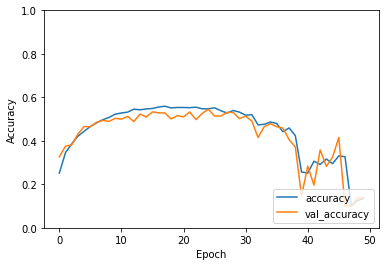

In [ ]:
opt_adam_resnet= resnet('adam',cifar_train_x,cifar_train_y,50,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 10

Epoch 1/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2979 - accuracy: 0.1153 - val_loss: 2.2887 - val_accuracy: 0.1163
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2345 - accuracy: 0.2123 - val_loss: 2.1792 - val_accuracy: 0.2739
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1693 - accuracy: 0.2788 - val_loss: 2.1550 - val_accuracy: 0.2981
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1420 - accuracy: 0.3099 - val_loss: 2.1749 - val_accuracy: 0.2713
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1185 - accuracy: 0.3363 - val_loss: 2.1017 - val_accuracy: 0.3552
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0969 - accuracy: 0.3583 - val_loss: 2.0864 - val_accuracy: 0.3659
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0794 - accuracy: 0.3763 - val_loss: 2.0752 - val_ac

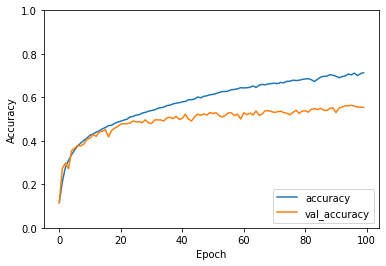

In [ ]:
opt_sgd_resnet =resnet('sgd',cifar_train_x,cifar_train_y,100,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

######  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3029 - accuracy: 0.1035 - val_loss: 2.3016 - val_accuracy: 0.1311
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3012 - accuracy: 0.1318 - val_loss: 2.3003 - val_accuracy: 0.1282
Epoch 3/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3000 - accuracy: 0.1156 - val_loss: 2.2991 - val_accuracy: 0.1233
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2990 - accuracy: 0.1134 - val_loss: 2.2980 - val_accuracy: 0.1212
Epoch 5/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2979 - accuracy: 0.1148 - val_loss: 2.2969 - val_accuracy: 0.1325
Epoch 6/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2967 - accuracy: 0.1406 - val_loss: 2.2956 - val_accuracy: 0.1431
Epoch 7/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2953 - accuracy: 0.1417 - val_loss: 2.2940 - val_ac

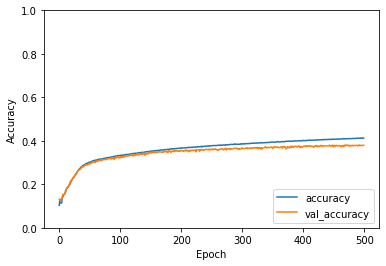

In [ ]:
opt_adadelta_resnet= resnet('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3014 - accuracy: 0.1042 - val_loss: 2.2988 - val_accuracy: 0.1034
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2961 - accuracy: 0.1178 - val_loss: 2.2910 - val_accuracy: 0.1193
Epoch 3/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2805 - accuracy: 0.1560 - val_loss: 2.2657 - val_accuracy: 0.1818
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2456 - accuracy: 0.2022 - val_loss: 2.2198 - val_accuracy: 0.2405
Epoch 5/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2037 - accuracy: 0.2516 - val_loss: 2.1885 - val_accuracy: 0.2635
Epoch 6/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1825 - accuracy: 0.2681 - val_loss: 2.1783 - val_accuracy: 0.2750
Epoch 7/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1702 - accuracy: 0.2828 - val_loss: 2.1671 - val_ac

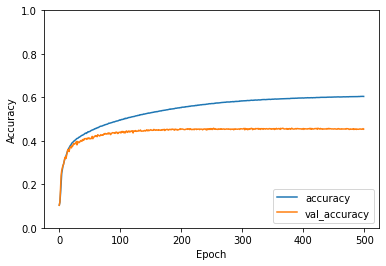

In [ ]:
opt_adagrad_resnet = resnet('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1569 - accuracy: 0.2918 - val_loss: 2.1172 - val_accuracy: 0.3324
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0916 - accuracy: 0.3619 - val_loss: 2.1138 - val_accuracy: 0.3384
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0502 - accuracy: 0.4051 - val_loss: 2.0365 - val_accuracy: 0.4206
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0126 - accuracy: 0.4432 - val_loss: 2.0083 - val_accuracy: 0.4464
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9855 - accuracy: 0.4710 - val_loss: 1.9669 - val_accuracy: 0.4894
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9601 - accuracy: 0.4967 - val_loss: 1.9676 - val_accuracy: 0.4887
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9406 - accuracy: 0.5175 - val_loss: 1.9366 - val_accuracy:

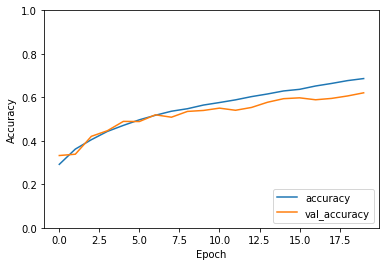

In [ ]:
opt_adamax_resnet = resnet('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

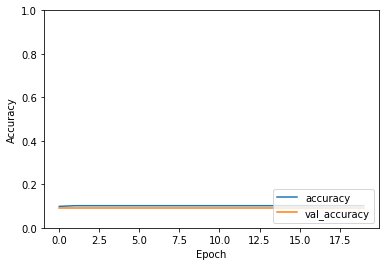

In [ ]:
opt_ftrl_resnet = resnet('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.1651 - accuracy: 0.2841 - val_loss: 2.1246 - val_accuracy: 0.3304
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1011 - accuracy: 0.3512 - val_loss: 2.0797 - val_accuracy: 0.3753
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0646 - accuracy: 0.3898 - val_loss: 2.0533 - val_accuracy: 0.4028
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0429 - accuracy: 0.4125 - val_loss: 2.0230 - val_accuracy: 0.4309
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0154 - accuracy: 0.4405 - val_loss: 1.9848 - val_accuracy: 0.4711
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9933 - accuracy: 0.4628 - val_loss: 1.9921 - val_accuracy: 0.4644
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9765 - accuracy: 0.4799 - val_loss: 1.9669 - val_ac

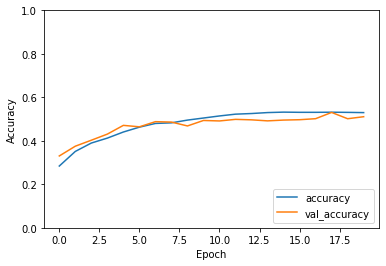

In [ ]:
opt_nadam_resnet = resnet('Nadam',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#### TASK 1.3 Inception Neural Network

##### Model

In [ ]:
def inception_net(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  
  incnet0 = tf.keras.layers.Conv2D(2,3,padding='SAME',activation='relu')(inputs)
  incnet0 = tf.keras.layers.MaxPool2D(2,strides=2)(incnet0)
  print(incnet0)

  # Block 1 :
  # Part 1: incnet0 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  #print(incnet_p1)
  # Part 2: incnet0 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  incnet_p2 = tf.keras.layers.Conv2D(2,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: incnet0 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  incnet_p3 = tf.keras.layers.Conv2D(2,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: incnet0 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(incnet0)
  incnet_p4 = tf.keras.layers.Conv2D(2,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 1
  block1 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  # Block 2 :
  # Part 1: block1 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  #print(incnet_p1)
  # Part 2: block1 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  incnet_p2 = tf.keras.layers.Conv2D(4,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block1 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  incnet_p3 = tf.keras.layers.Conv2D(4,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block1 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block1)
  incnet_p4 = tf.keras.layers.Conv2D(4,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block2 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #Block2 Maxpool 2x2,stride = 2
  block2_maxpool = tf.keras.layers.MaxPool2D(2,strides=2)(block2)

  # Block 3 :
  # Part 1: block2maxpool -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  #print(incnet_p1)
  # Part 2: block2maxpool -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  incnet_p2 = tf.keras.layers.Conv2D(8,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block2maxpool -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  incnet_p3 = tf.keras.layers.Conv2D(8,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block2maxpool -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block2_maxpool)
  incnet_p4 = tf.keras.layers.Conv2D(8,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block3 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  # Block 4 :
  # Part 1: block3 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  #print(incnet_p1)
  # Part 2: block3 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  incnet_p2 = tf.keras.layers.Conv2D(16,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block3 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  incnet_p3 = tf.keras.layers.Conv2D(16,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block3 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block3)
  incnet_p4 = tf.keras.layers.Conv2D(16,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block4 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #Block2 Maxpool 2x2,stride = 2
  block4_maxpool = tf.keras.layers.MaxPool2D(2,strides=2)(block4) 

  # Block 5 :
  # Part 1: block4_maxpool -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  #print(incnet_p1)
  # Part 2: block4_maxpool -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  incnet_p2 = tf.keras.layers.Conv2D(32,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block4_maxpool -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  incnet_p3 = tf.keras.layers.Conv2D(32,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block4_maxpool -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block4_maxpool)
  incnet_p4 = tf.keras.layers.Conv2D(32,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block5 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #avgpool
  avg_pool = tf.keras.layers.MaxPool2D(2)(block5)

  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax')(mlp)

  model = tf.keras.Model(inputs,output)
  #model.summary()
  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

##### Training

###### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Tensor("max_pooling2d_144/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Model: "functional_38"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_513 (Conv2D)             (None, 32, 32, 2)    56          input_37[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_144 (MaxPooling2D (None, 16, 16, 2)    0           conv2d_513[0][0]                 
__________________________________________________________________________________________________
conv2d_515 (Conv2D)             (None, 16, 16, 2)    6           max_pooling2d_144[0][0]          
________

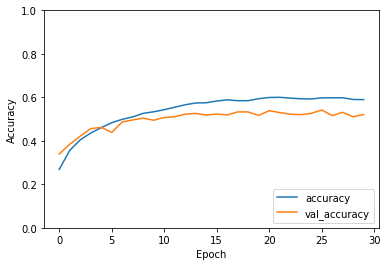

In [ ]:
opt_adam_inception_net= inception_net('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 20

Tensor("max_pooling2d_45/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3005 - accuracy: 0.1005 - val_loss: 2.2992 - val_accuracy: 0.0980
Epoch 2/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.2959 - accuracy: 0.1190 - val_loss: 2.2905 - val_accuracy: 0.1312
Epoch 3/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.2734 - accuracy: 0.1640 - val_loss: 2.2452 - val_accuracy: 0.2079
Epoch 4/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.2093 - accuracy: 0.2468 - val_loss: 2.2047 - val_accuracy: 0.2450
Epoch 5/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1799 - accuracy: 0.2703 - val_loss: 2.1590 - val_accuracy: 0.2953
Epoch 6/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1503 - accuracy: 0.3025 - val_loss: 2.1311 - val_accuracy: 0.3260
Epoch 7/70
1250/1250 [==============================]

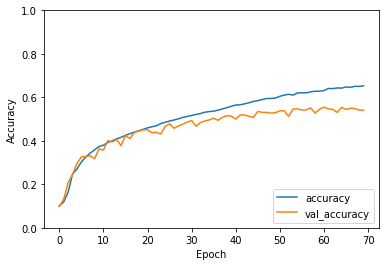

In [ ]:
opt_sgd_inception_net =inception_net('sgd',cifar_train_x,cifar_train_y,70,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

######  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Tensor("max_pooling2d_54/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/500
1250/1250 [==============================] - 13s 10ms/step - loss: 2.3025 - accuracy: 0.0862 - val_loss: 2.3025 - val_accuracy: 0.0870
Epoch 2/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0877 - val_loss: 2.3025 - val_accuracy: 0.0870
Epoch 3/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0891 - val_loss: 2.3025 - val_accuracy: 0.0875
Epoch 4/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0905 - val_loss: 2.3025 - val_accuracy: 0.0889
Epoch 5/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0918 - val_loss: 2.3025 - val_accuracy: 0.0907
Epoch 6/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0931 - val_loss: 2.3025 - val_accuracy: 0.0933
Epoch 7/500
1250/1250 [==================

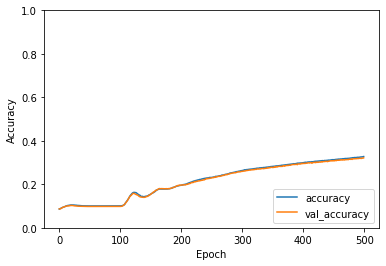

In [ ]:
opt_adadelta_inception_net= inception_net('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Tensor("max_pooling2d_63/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1070
Epoch 2/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.1114 - val_loss: 2.3025 - val_accuracy: 0.1325
Epoch 3/500
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1359 - val_loss: 2.3025 - val_accuracy: 0.1424
Epoch 4/500
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1387 - val_loss: 2.3025 - val_accuracy: 0.1456
Epoch 5/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.1486 - val_loss: 2.3025 - val_accuracy: 0.1489
Epoch 6/500
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1487 - val_loss: 2.3025 - val_accuracy: 0.1459
Epoch 7/500
1250/1250 [=====================

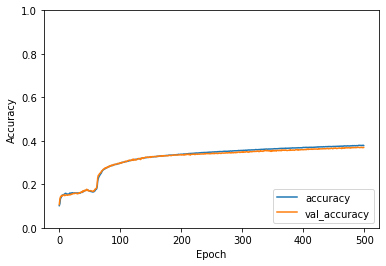

In [ ]:
opt_adagrad_inception_net = inception_net('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Tensor("max_pooling2d_72/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.1842 - accuracy: 0.2631 - val_loss: 2.1522 - val_accuracy: 0.2951
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1156 - accuracy: 0.3369 - val_loss: 2.0949 - val_accuracy: 0.3592
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0827 - accuracy: 0.3715 - val_loss: 2.0893 - val_accuracy: 0.3645
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0610 - accuracy: 0.3938 - val_loss: 2.0537 - val_accuracy: 0.3996
Epoch 5/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.0417 - accuracy: 0.4146 - val_loss: 2.0442 - val_accuracy: 0.4081
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0257 - accuracy: 0.4307 - val_loss: 2.0316 - val_accuracy: 0.4229
Epoch 7/20
1250/1250 [==============================]

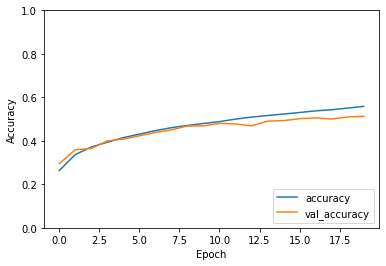

In [ ]:
opt_adamax_inception_net = inception_net('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Tensor("max_pooling2d_81/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================]

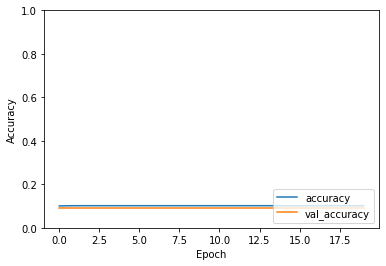

In [ ]:
opt_ftrl_inception_net = inception_net('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

###### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Tensor("max_pooling2d_90/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.1377 - accuracy: 0.3107 - val_loss: 2.0742 - val_accuracy: 0.3814
Epoch 2/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.0359 - accuracy: 0.4201 - val_loss: 2.0108 - val_accuracy: 0.4429
Epoch 3/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.0004 - accuracy: 0.4565 - val_loss: 2.0001 - val_accuracy: 0.4573
Epoch 4/10
1250/1250 [==============================] - 19s 16ms/step - loss: 1.9754 - accuracy: 0.4826 - val_loss: 1.9763 - val_accuracy: 0.4795
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.9576 - accuracy: 0.5004 - val_loss: 1.9687 - val_accuracy: 0.4898
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.9412 - accuracy: 0.5162 - val_loss: 1.9571 - val_accuracy: 0.5006
Epoch 7/10
1250/1250 [=========================

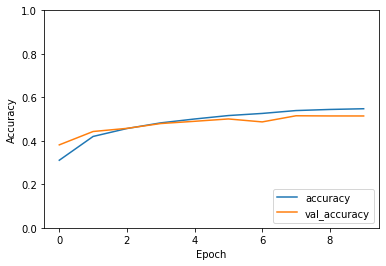

In [ ]:
opt_nadam_inception_net = inception_net('Nadam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### Task Summary

| S.no | Model        | Optimizer | Training Accuracy | Validation Accuracy | Testing Accuracy | Total Epochs | Epochs untill Convergence | Observation                                                                                               |
|------|--------------|-----------|-------------------|---------------------|------------------|--------------|---------------------------|-----------------------------------------------------------------------------------------------------------|
| 1.a  | Basic CNN    | Adam      | 79.29             | 67.94               | 67.57            | 10           | More than 10              | Overfitting observed after 2 epochs                                                                       |
| 1.b  | Basic CNN    | SGD       | 78.71             | 65.49               | 65.70            | 20           | More than 10              | Overfitting observed after 10 epochs                                                                      |
| 1.c  | Basic CNN    | Adadelta  | 52.08             | 51.53               | 51.33            | 500          | More than 500             | Very slow learning. Thus more epochs needed.No overfitting                                                |
| 1.d  | Basic CNN    | Adagrad   | 58.80             | 56.41               | 57.17            | 500          | More than 500             | Very slow learning. Thus more epochs needed. No overfitting                                               |
| 1.e  | Basic CNN    | Adamax    | 75.58             | 66.94               | 67.36            | 20           | More than 20              | Overfitting observed after 8 epochs                                                                       |
| 1.f  | Basic CNN    | FTRL      | 1.017             | 0.933               | 0.1              | 20           | More than 20              | No learninig                                                                                              |
| 1.g  | Basic CNN    | Nadam     | 79.27             | 68.42               | 68.43            | 10           | More than 10              | Overfitting observed after 2 epochs                                                                       |
| 2.a  | Resnet       | Adam      | 54.73             | 52.62               | 50.51            | 50           | 10 epochs                 | After 20 epochs, the accuracy starts decreasing.This might be indication of getting stuck in local minima |
| 2.b  | Resnet       | SGD       | 71.43             | 55.35               | 54.75            | 100          | More than 100 epochs      | Overfitting observed after 20 epochs                                                                      |
| 2.c  | Resnet       | Adadelta  | 41.24             | 38.0                | 38.36            | 500          | 500 epochs                | Very slow learning. No overfitting                                                                        |
| 2.d  | Resnet       | Adagrad   | 60.41             | 45.39               | 45.85            | 500          | 300 epochs                | very slow learning, Overfitting observed at initial epochs                                                |
| 2.e  | Resnet       | Adamax    | 68.63             | 62.08               | 61.82            | 20           | More than 20 epochs       | Slight overfitting observed but may be trained for more epochs                                            |
| 2.f  | Resnet       | FTRL      | 1.01              | 0.9                 | 1                | 20           | No learning               | No learning                                                                                               |
| 2.g  | Resnet       | Nadam     | 52.98             | 51.09               | 50.59            | 20           | 10 epochs                 | Training not efficient but no overfitting. May be stuck in local minima                                   |
| 3.a  | InceptionNet | Adam      | 58.97             | 52.06               | 51.91            | 20           | 15 epochs                 | Training not efficient. No overfitting                                                                    |
| 3.b  | InceptionNet | SGD       | 65.32             | 54.06               | 54.54            | 70           | More than 70 epochs       | Overfitting observed after 40 epochs. The accuracy line of valiation is wavy                              |
| 3.c  | InceptionNet | Adadelta  | 32.77             | 32.18               | 32.97            | 500          | More than 500 epochs      | Very slow learning, No overfitting                                                                        |
| 3.d  | InceptionNet | Adagrad   | 37.85             | 36.95               | 37.94            | 500          | 400 epochs                | Very slow learning, Inefficient learning, No overfitting                                                  |
| 3.e  | InceptionNet | Adamax    | 55.84             | 51.28               | 50.89            | 20           | More than 20              | Learning is still possible without overfitting                                                            |
| 3.f  | InceptionNet | FTRL      | 1.017             | 0.9                 | 1.0              | 20           | No learning               | No learning                                                                                               |
| 3.g  | InceptionNet | Nadam     | 54.76             | 51.43               | 50.94            | 10           | 8 epochs                  | Inefficient learning                                                                                      |

* Adam : Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

* SGD : Stochastic Gradient Descent

* Adadelta : Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:

  *  The continual decay of learning rates throughout training
  *  The need for a manually selected global learning rate

* Adagrad : Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

* Adamax : It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, specially in models with embeddings.

* FTRL : Integrated L2 and L1 penalty

* Nadam : like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.


It was observed that Adadelta and Adagrad performed similar for all the models as it was seen that they are very slow in learning. The possible reason for this could be adaptive learning rate.

FTRL optimizer had the same effect in every model and resulted in no learning.

The other optimizers were affected by the model complexity and number of parameters.

# Task 2: Regularizers
In this task, you will investigate how different regularization techniques affect the training behavior.

Pick a architecture of your choice to train on Cifar10.
Using the same training set, optimizer (and its hyperparameters),
train this architecture first without any regularization, then add different regularizers.
Compare the training and valid/test curves, e.g. regarding:

*     training and test accuracy (or loss)
*     generalization error, i.e. the gap between train and test (including how strong the overfitting gets)
*     difference between when training has converged and at the sweet spot of generalization (smallest gap)

Regularization can be applied to the model (e.g. dropout, L1, L2, added noise) or to the inputs themselves (e.g. rotations, added noise, blurring).

Now choose a different architecture and/or data set and repeat the experiments.
Are the results (qualitatively) still the same? If they are different, discuss potential reasons.

Bonus: Do not only compare visually, but use meaningful quantitative measures for comparison.

## Regularization

* Motivation: Investigate how different Regularization techniques affect the training behavior.

* Dataset : Cifar10

* Architecture : Best model from Task1's architecture

* Regularization techniques:
 * L1, L2 regularizer
 * Dropouts
 * Adding noise

* Comparision Criteria: Training Curves
 * Steps still convergence
 * Training accuracy untill convergence
 * Stability of training

### Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
#from tensorflow.keras import datasets#, layers, models

### Loading and Splitting Data

In [ ]:
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Cifar10
(cifar_train_x_temp, cifar_train_y_temp), (cifar_test_x , cifar_test_y) =cifar10.load_data() 

#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data
cifar_train_x, cifar_val_x, cifar_train_y, cifar_val_y = train_test_split(cifar_train_x_temp, cifar_train_y_temp, test_size=0.20, random_state=42)

#Standardizing the dataset
cifar_train_x, cifar_val_x, cifar_test_x = cifar_train_x/255.0, cifar_val_x/255.0, cifar_test_x/255.0

print('cifar10 train data      : {}'.format(cifar_train_x.shape))
print('cifar10 validation data : {}'.format(cifar_val_x.shape))
print('cifar10 test data       : {}'.format(cifar_test_x.shape))

cifar10 train data      : (40000, 32, 32, 3)
cifar10 validation data : (10000, 32, 32, 3)
cifar10 test data       : (10000, 32, 32, 3)


### Building Model without regularizer

In [ ]:
def cnn_base_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.1163 - accuracy: 0.3347 - val_loss: 2.0795 - val_accuracy: 0.3739
Epoch 2/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.0034 - accuracy: 0.4531 - val_loss: 1.9642 - val_accuracy: 0.4934
Epoch 3/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9541 - accuracy: 0.5041 - val_loss: 1.9725 - val_accuracy: 0.4877
Epoch 4/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9156 - accuracy: 0.5442 - val_loss: 1.9143 - val_accuracy: 0.5437
Epoch 5/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8892 - accuracy: 0.5701 - val_loss: 1.8986 - val_accuracy: 0.5586
Epoch 6/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8634 - accuracy: 0.5957 - val_loss: 1.8857 - val_accuracy: 0.5743
Epoch 7/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8438 - accuracy: 0.6174 - val_loss: 1.8639 -

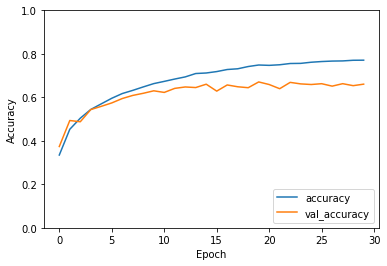

In [ ]:
model2 = cnn_base_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### L2 Regularizer

In [ ]:
def cnn_l2_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer='l2')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.1800 - accuracy: 0.2890 - val_loss: 2.1713 - val_accuracy: 0.3028
Epoch 2/30
1250/1250 [==============================] - 39s 32ms/step - loss: 2.0845 - accuracy: 0.3967 - val_loss: 2.0627 - val_accuracy: 0.4217
Epoch 3/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.0461 - accuracy: 0.4388 - val_loss: 2.0196 - val_accuracy: 0.4629
Epoch 4/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.0160 - accuracy: 0.4690 - val_loss: 2.0065 - val_accuracy: 0.4847
Epoch 5/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9974 - accuracy: 0.4916 - val_loss: 1.9745 - val_accuracy: 0.5176
Epoch 6/30
1250/1250 [==============================] - 39s 31ms/step - loss: 1.9772 - accuracy: 0.5142 - val_loss: 1.9594 - val_accuracy: 0.5337
Epoch 7/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9602 - accuracy: 0.5324 - val_loss: 1.9544 -

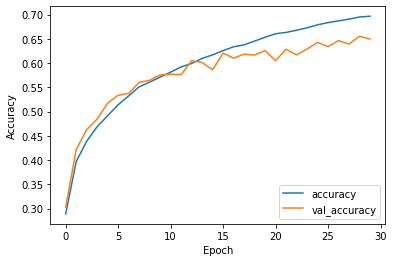

In [ ]:
model3 = cnn_l2_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### Dropout Regularizer

In [ ]:
def cnn_dropout_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.1421 - accuracy: 0.3072 - val_loss: 2.1634 - val_accuracy: 0.3633
Epoch 2/30
1250/1250 [==============================] - 49s 39ms/step - loss: 2.0753 - accuracy: 0.3792 - val_loss: 2.1075 - val_accuracy: 0.3959
Epoch 3/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0471 - accuracy: 0.4081 - val_loss: 2.1279 - val_accuracy: 0.3504
Epoch 4/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0384 - accuracy: 0.4176 - val_loss: 2.1447 - val_accuracy: 0.3095
Epoch 5/30
1250/1250 [==============================] - 47s 37ms/step - loss: 2.0281 - accuracy: 0.4262 - val_loss: 2.0871 - val_accuracy: 0.3834
Epoch 6/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0170 - accuracy: 0.4391 - val_loss: 2.0273 - val_accuracy: 0.4419
Epoch 7/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0073 - accuracy: 0.4485 - val_loss: 2.1336 -

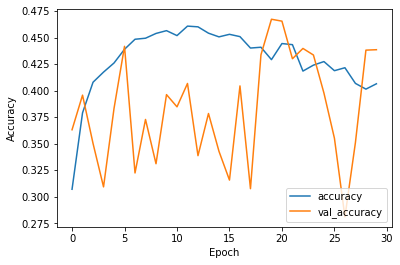

In [ ]:
model4 = cnn_dropout_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### Batch Normalization

In [ ]:
def cnn_bn_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer='l2')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 53s 43ms/step - loss: 2.0333 - accuracy: 0.4225 - val_loss: 2.0098 - val_accuracy: 0.4450
Epoch 2/30
1250/1250 [==============================] - 52s 41ms/step - loss: 1.9297 - accuracy: 0.5267 - val_loss: 1.9451 - val_accuracy: 0.5124
Epoch 3/30
1250/1250 [==============================] - 53s 42ms/step - loss: 1.8870 - accuracy: 0.5716 - val_loss: 1.8950 - val_accuracy: 0.5622
Epoch 4/30
1250/1250 [==============================] - 52s 42ms/step - loss: 1.8572 - accuracy: 0.6016 - val_loss: 2.0039 - val_accuracy: 0.4534
Epoch 5/30
1250/1250 [==============================] - 52s 42ms/step - loss: 1.8359 - accuracy: 0.6233 - val_loss: 1.8596 - val_accuracy: 0.5992
Epoch 6/30
1250/1250 [==============================] - 54s 44ms/step - loss: 1.8228 - accuracy: 0.6364 - val_loss: 1.8742 - val_accuracy: 0.5825
Epoch 7/30
1250/1250 [==============================] - 53s 42ms/step - loss: 1.8033 - accuracy: 0.6562 - val_loss: 1.8468 -

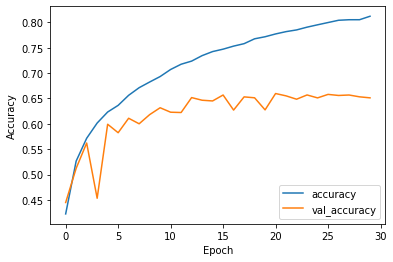

In [ ]:
model5 = cnn_bn_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### Mix and Match

In [ ]:
def cnn_mix_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.2)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.2)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.2)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 58s 47ms/step - loss: 2.0434 - accuracy: 0.4113 - val_loss: 2.0139 - val_accuracy: 0.4433
Epoch 2/30
1250/1250 [==============================] - 59s 47ms/step - loss: 1.9573 - accuracy: 0.4981 - val_loss: 2.0568 - val_accuracy: 0.3984
Epoch 3/30
1250/1250 [==============================] - 61s 49ms/step - loss: 1.9239 - accuracy: 0.5329 - val_loss: 1.9592 - val_accuracy: 0.4986
Epoch 4/30
1250/1250 [==============================] - 61s 49ms/step - loss: 1.8965 - accuracy: 0.5601 - val_loss: 2.0919 - val_accuracy: 0.3649
Epoch 5/30
1250/1250 [==============================] - 60s 48ms/step - loss: 1.8780 - accuracy: 0.5801 - val_loss: 1.9783 - val_accuracy: 0.4779
Epoch 6/30
1250/1250 [==============================] - 59s 47ms/step - loss: 1.8604 - accuracy: 0.5979 - val_loss: 1.9501 - val_accuracy: 0.5065
Epoch 7/30
1250/1250 [==============================] - 59s 48ms/step - loss: 1.8507 - accuracy: 0.6077 - val_loss: 1.9857 -

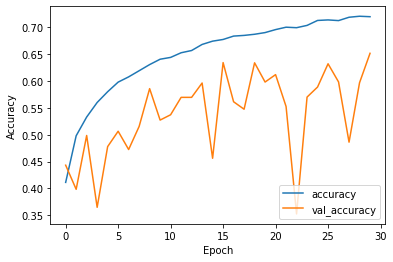

In [ ]:
model6 = cnn_mix_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### Resnet Architecture

In [ ]:
def resnet(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  # Input image shape = 32 x 32 x 3
  # Initial Block
  conv1 = tf.keras.layers.Conv2D(32,1,padding = 'SAME',activation='relu')(inputs) # shape = 32 x 32 x 16 
  conv1_pool = tf.keras.layers.MaxPool2D(2)(conv1) #shape = 32 x 32 x 16
  
  #Block 1
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv1_pool) # shape = 16 x 16 x 16
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv2) # shape = 16 x 16 x 16
  add1 = tf.keras.layers.Add()([conv1_pool,conv2,]) # shape = 16 x 16 x 16
  add1_relu = tf.keras.layers.Activation('relu')(add1) # shape = 16 x 16 x 16

  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(add1_relu) # shape = 16 x 16 x 16
  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv3) # shape = 16 x 16 x 16
  add2 = tf.keras.layers.Add()([add1_relu,conv3]) # shape = 16 x 16 x 16
  add2_relu = tf.keras.layers.Activation('relu')(add2) # shape = 16 x 16 x 16
  
  #Transition 1
  transition_conv1 = tf.keras.layers.Conv2D(64,1,activation = 'relu')(add2_relu) # shape = 16 x 16 x 32
  transition_conv_pool = tf.keras.layers.MaxPool2D(2)(transition_conv1) # shape = 8 x 8 x 32
  
  #Block 2
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(transition_conv_pool)  # shape = 8 x 8 x 32
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv4) # shape = 8 x 8 x 32
  add3 = tf.keras.layers.Add()([transition_conv_pool,conv4]) # shape = 8 x 8 x 32
  add3_relu = tf.keras.layers.Activation('relu')(add3) # shape = 8 x 8 x 32

  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(add3_relu) # shape = 8 x 8 x 32 
  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv5)# shape = 8 x 8 x 32
  add4 = tf.keras.layers.Add()([add3_relu,conv5])# shape = 8 x 8 x 32
  add4_relu = tf.keras.layers.Activation('relu')(add4)# shape = 8 x 8 x 32

  #Transition 2
  transition_conv2 = tf.keras.layers.Conv2D(128,1,activation = 'relu')(add4_relu) # shape = 8 x 8 x 64
  transition_conv2_pool = tf.keras.layers.MaxPool2D(2)(transition_conv2) # shape = 4 x 4 x 64
  #print(transition_conv2_pool)

  #Block 3
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(transition_conv2_pool) # shape = 4 x 4 x 64 
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv6)# shape = 4 x 4 x 64
  add5 = tf.keras.layers.Add()([transition_conv2_pool,conv6])# shape = 4 x 4 x 64
  add5_relu = tf.keras.layers.Activation('relu')(add5)# shape = 4 x 4 x 64
  #print(add5_relu)

  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(add5_relu) # shape = 4 x 4 x 64 
  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv7)# shape = 4 x 4 x 64
  add6 = tf.keras.layers.Add()([add5_relu,conv7])# shape = 4 x 4 x 64
  add6_relu = tf.keras.layers.Activation('relu')(add6)# shape = 4 x 4 x 64
  #print(add6_relu)

  #Average pool
  avg_pool = tf.keras.layers.MaxPool2D(2)(add6_relu)# shape = 4 x 4 x 64

  #MLP
  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax',kernel_regularizer='l2')(mlp)

  model = tf.keras.Model(inputs,output)
  #model.summary()

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

In [ ]:
model7 = resnet('sgd',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

Epoch 1/30
 404/1250 [========>.....................] - ETA: 3:27 - loss: 2.4722 - accuracy: 0.1276

## Task Summary

| Architecture | Regularizer             | Total epochs | Training Accuracy | Validation Accuracy | Testing Accuracy | Observations                                                                      |
|--------------|-------------------------|--------------|-------------------|---------------------|------------------|-----------------------------------------------------------------------------------|
| CNN(Adam)    | None                    | 30           | 77.09             | 66.06               | 65.59            | Overfitting obs after 7 epochs                                                    |
| CNN(Adam)    | L2                      | 30           | 69.67             | 64.95               | 65.27            | Slight overfitting after 20 epochs                                                |
| CNN(Adam)    | Dropout(0.5)            | 30           | 40.66             | 43.87               | 44.15            | The validation accuracy was inconsistent throughout and had too much fluctuations |
| CNN(Adam)    | Batch Normalization     | 30           | 81.20             | 65.12               | 65.03            | No effect of reg. Overfitting obs after 5 epochs                                  |
| CNN(Adam)    | Mix(L2,Dropout(0.2),BN) | 30           | 71.97             | 65.16               | 64.49            | Strong fluctuation in validation accuracy.                                        |
| ResNet(SGD)  | None                    | 100          | 71.43             | 55.35               | 54.75            | Overfitting obs after 20 epochs                                                   |

# Task 3: Transfer Learning
In this task, you will implement different strategies on doing transfer learning.
You will also investigate how well transfer learning is applicable to inputs of different data distributions.

## 3.1 same distribution
Split the MNIST dataset, such that 7 classes are the source domain and the other 3 classes are the target domain.
Start with the source domain data set and train a model on it.
From the trained model, cut off the final classification layer and replace it with a new layer for the target domain classes. For now, keep all layers trainable.
Now train this model on the target domain data set. For comparison, also train a freshly initialized model on the target domain data set.

How well did the transfer learning work, compared to training on the target data set from scratch?
You can e.g. compare:

*     achieved accuracy
*     steps until convergence
*     generalization

## 3.2 different distribution
Now we will work with MNIST as source domain and FMNIST as target domain. (This is convenient, as they already have the same input shape.)
Similar to 3.1, first train a model on the MNIST and use the pre-trained model as initialization for a model trained on FMNIST.
Compare this transfer learned model with a model trained on FMNIST from scratch using the measures from 3.1.

Repeat the experiment with FMNIST as source and MNIST as target!
Does transfer learning work better or worse this time?


## 3.3 Compare diffferent ways to do the transfer learning

Transfer learning is done with different strategies.
You can for example investigate:

* freezing all pre-trained layers (i.e. set trainable to False)
* freezing only some bottom layers
* replacing (or reinitializing) multiple top layers
* replacing the source classification layer by multiple new ones for the target domain. This is particularly meaningful, if the target domain is more complex than the source domain.
Do you observe any differences in the final result using different ways of going from target to source?

## Transfer Learning - Unified Answers and Description

### Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### Loading and Managing dataset for the task

In [ ]:
# The initial task was to create subsets of dataset such that we have subset 1 with instances belonging to 7 classes and subset 2
# belonging to remaining 3 classes. For the task, instances of class 0, 1 and 2 were selected for the target domain and the rest 
# were selected as source domain. Source domain was used for initial model training.

# Loading mnist digit data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
# Loadiong Fashion mnist data
(X_train_fmnist, Y_train_fmnist), (X_test_fmnist, Y_test_fmnist) = tf.keras.datasets.fashion_mnist.load_data()

# Defining class for allowing class split as mentioned above
def data_split(label, instance):
  ips = [] # instance_primary_subset = ips
  lps = [] # label_primary_subset = lps
  iss = [] # instance_secondary_subset = iss
  lss = [] # label_secondary_subset = lss
  ind = []
  for idx,item in enumerate(label):
    if item == 7 or item == 8 or item == 9:
      lss.append(label[idx])
      iss.append(instance[idx])
      ind.append(idx)
  for idx,item in enumerate(label):
    if idx not in ind:
      lps.append(label[idx])
      ips.append(instance[idx])
  ips = np.asarray(ips)
  lps = np.asarray(lps)
  iss = np.asarray(iss)
  lss = np.asarray(lss)
  return (ips,lps,iss,lss)

# Both training and testing data was split into source and target domain
# Mnist digit data
x_train_prim,y_train_prim, x_train_sec,y_train_sec =  data_split(Y_train,X_train)
x_test_prim,y_test_prim,x_test_sec,y_test_sec = data_split(Y_test,X_test)

# Fashion Mnist data
x_test_prim_fmnist ,y_test_prim_fmnist ,x_test_sec_fmnist ,y_test_sec_fmnist  = data_split(Y_test_fmnist,X_test_fmnist)
x_train_prim_fmnist,y_train_prim_fmnist,x_train_sec_fmnist,y_train_sec_fmnist = data_split(Y_train_fmnist,X_train_fmnist)

print('x_train_prim :{}'.format(x_train_prim.shape))
print('y_train_prim :{}'.format(y_train_prim.shape))
print('x_train_sec  :{}'.format(x_train_sec.shape))
print('Y_train_sec  :{}'.format(y_train_sec.shape))
print('x_test_prim  :{}'.format(x_test_prim.shape))
print('y_test_prim  :{}'.format(y_test_prim.shape))
print('x_test_sec   :{}'.format(x_test_sec.shape))
print('Y_test_sec   :{}'.format(y_test_sec.shape))

# To adjust the range of the dense part of the model, the classes of the target domain are changed to class 7 = 0, class 8 = 1, 
# class 9 = 2
def ass_new_class(data):
  for idx,item in enumerate(data):
    if item == 7:
      data[idx] = 0
    elif item == 8:
      data[idx] = 1
    else:
      data[idx] = 2
  return (data)

y_train_sec = ass_new_class(y_train_sec)
y_test_sec = ass_new_class(y_test_sec)

y_train_sec_fmnist = ass_new_class(y_train_sec)
y_test_sec_fmnist = ass_new_class(y_test_sec)

x_train_prim :(41935, 28, 28)
y_train_prim :(41935,)
x_train_sec  :(18065, 28, 28)
Y_train_sec  :(18065,)
x_test_prim  :(6989, 28, 28)
y_test_prim  :(6989,)
x_test_sec   :(3011, 28, 28)
Y_test_sec   :(3011,)


In [ ]:
y_train_sec_fmnist.shape

(18065,)

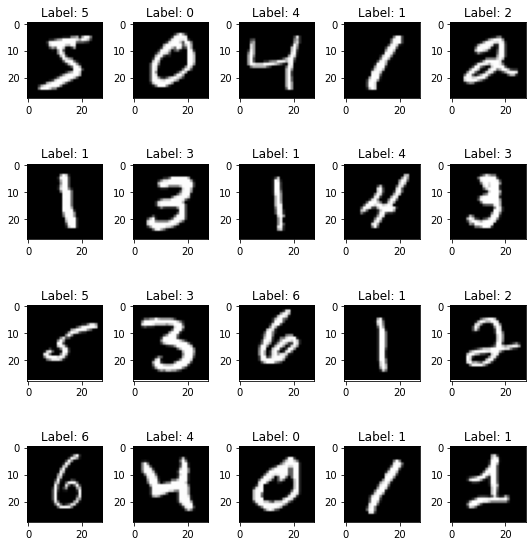

In [ ]:
# Verifying the split visually and comparing the corresponding labels for the images.
num = 20
images = x_train_prim[:num]
labels = y_train_prim[:num]

num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

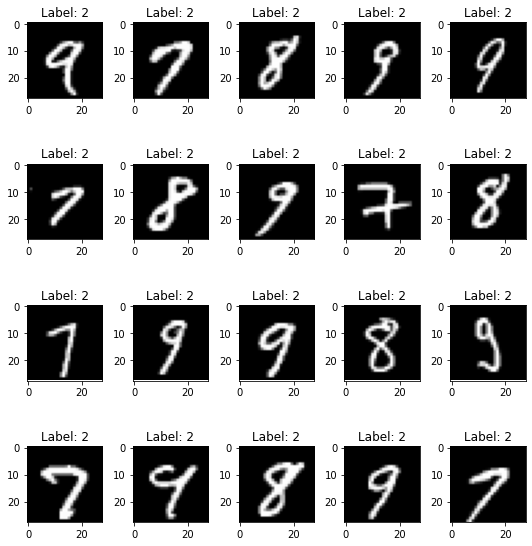

In [ ]:
num = 20
images = x_train_sec[:num]
labels = y_train_sec[:num]

num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
# The instances needs to be reshaped and standardized. The pixel value of each instance is in the range of (0, 255). To standardize the 
# values(transforming the values between 0 and 1), each pixel was standardized by 255.) 
#x_train_prim = x_train_prim.reshape(-1,28,28,1).astype("float32")/255
#x_train_sec = x_train_sec.reshape(-1,28,28,1).astype("float32")/255
#x_test_prim = x_test_prim.reshape(-1,28,28,1).astype("float32")/255
#x_test_sec = x_test_sec.reshape(-1,28,28,1).astype("float32")/255
x_train_prim = x_train_prim/255
x_train_sec = x_train_sec/255
x_test_prim = x_test_prim/255
x_test_sec = x_test_sec/255
x_train_prim_fmnist = x_train_prim_fmnist/255
x_train_sec_fmnist = x_train_sec_fmnist/255
x_test_prim_fmnist = x_test_prim_fmnist/255
x_test_sec_fmnist = x_test_sec_fmnist/255

### Defining the Densenet model

In [ ]:
# For the task of training, inception net was Densenet was used as the base model. 

def densenet(d,opt,train_x,train_y,epo,val_x,val_y):
  inputs = tf.keras.layers.Input((28,28,1))
  #initial convolution layer before the denseblock
  den0 = tf.keras.layers.Conv2D(16,3,padding='SAME',activation='relu')(inputs)
  den1 = tf.keras.layers.BatchNormalization()(den0)
  den2 = tf.keras.layers.Activation('relu')(den1)

  # Block 1
  #Each block consists of 4 convolution layers. The output of each layer is passed on to all the following layers as an input.
  den3 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den2) # block1-Layer1: shape = 28 x 28 x 6
  den4 = tf.keras.layers.concatenate([den2,den3])# block 1- concatenation of input(den2) and layer1(den3): shape = 28 x 28 x 22
  den5 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den4) # block1-Layer2: shape = 28 x 28 x 6
  den6 = tf.keras.layers.concatenate([den4,den5]) # block 1- concatenation of input(den2), layer1(den3) and layer2(den5): shape = 28 x 28 x 28 
  den7 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den6) # block1-Layer3: shape = 28 x 28 x 6
  den8 = tf.keras.layers.concatenate([den6,den7]) # block 1- concatenation of input(den2), layer1(den3),layer2(den5) and layer3(den7): shape = 28 x 28 x 34
  den9 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den8) # block1-Layer4: shape = 28 x 28 x 6
  den10 = tf.keras.layers.concatenate([den8,den9]) # block 1- concatenation of input(den2), layer1(den3),layer2(den5),layer3(den7) and layer4(den9): shape = 28 x 28 x 40

  #transition layer 1
  den11 = tf.keras.layers.Conv2D(1,3,padding='SAME',activation='relu')(den10) # shape = 28 x 28 x 1
  den12 = tf.keras.layers.AvgPool2D(2,strides=2)(den11)# shape = 14x14x1

  #Block2
  den13 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den12)
  den14 = tf.keras.layers.concatenate([den12,den13])
  den15 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den14)
  den16 = tf.keras.layers.concatenate([den14,den15]) 
  den17 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den16)
  den18 = tf.keras.layers.concatenate([den16,den17])
  den19 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den18)
  den20 = tf.keras.layers.concatenate([den18,den19])
  
  #transition layer 2
  den21 = tf.keras.layers.Conv2D(1,3,padding='SAME',activation='relu')(den20) # shape = 32 x 32 x 1
  den22 = tf.keras.layers.AvgPool2D(2,strides=2)(den21)# shape = 6x6x1
  
  #Block3
  den23 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den22)
  den24 = tf.keras.layers.concatenate([den22,den23])
  den25 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den24)
  den26 = tf.keras.layers.concatenate([den24,den25]) 
  den27 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den26)
  den28 = tf.keras.layers.concatenate([den26,den27])
  den29 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den28)
  den30 = tf.keras.layers.concatenate([den28,den29])

  #classifictaion layer
  den31 = tf.keras.layers.AvgPool2D(2,strides=2)(den30)
  den32 = tf.keras.layers.Flatten()(den31)
  output = tf.keras.layers.Dense(d,activation='softmax')(den32)
  
  model = tf.keras.Model(inputs,output)
  model.summary()

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  return model

  #test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  #print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))


### Transfer learning for Mnist Digit Data set

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 28, 28, 16)   64          conv2d_60[0][0]                  
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 28, 28, 16)   0           batch_normalization_4[0][0]      
______________________________________________________________________________________

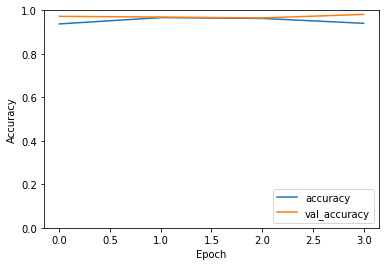

In [ ]:
# Training the model for the Mnist digit dataset for the source domain
source_domain= densenet(7,'adam',x_train_prim,y_train_prim,4,x_test_prim,y_test_prim)

In [ ]:
# Freezing the last layer of the model and using the prelearnt weight for the target domain
#source_domain.trainable = True # allows all the parameters to be trainable
source_domain.trainable = False # Prevents the parameters of the layers from getting trained again(Freezing parameters)
base_inputs = source_domain.layers[0].input
base_outputs = source_domain.layers[-2].output
target_output = tf.keras.layers.Dense(3)(base_outputs)
target_model = tf.keras.Model(inputs = base_inputs, outputs = target_output)
print(target_model.summary())

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 28, 28, 16)   64          conv2d_60[0][0]                  
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 28, 28, 16)   0           batch_normalization_4[0][0]      
______________________________________________________________________________________

In [ ]:
# The training is done on the source domain model but except the last dense layer. For the purpose of comparision the pretrained 
# model's parameters were trainable. As the result indicates, the accuracy is high and time taken for traininig is 180s on an average for 5 epochs.
target_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
565/565 [==============================] - 184s 326ms/step - loss: 1.3331 - accuracy: 0.9257 - val_loss: 0.0848 - val_accuracy: 0.9671
Epoch 2/5
565/565 [==============================] - 182s 321ms/step - loss: 0.0677 - accuracy: 0.9774 - val_loss: 0.0459 - val_accuracy: 0.9847
Epoch 3/5
565/565 [==============================] - 190s 336ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 4/5
565/565 [==============================] - 182s 321ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 5/5
565/565 [==============================] - 187s 331ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0250 - val_accuracy: 0.9910


In [ ]:
# The training is done by keeping the trainable parameters of the source domain as false and only the final dense layer is allowed
# to train. The accuracy is comparable but the training time is reduced to 1/3rd of the original time taken.
target_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
565/565 [==============================] - 58s 103ms/step - loss: 2.4101 - accuracy: 0.9257 - val_loss: 0.9602 - val_accuracy: 0.9595
Epoch 2/5
565/565 [==============================] - 58s 103ms/step - loss: 0.8827 - accuracy: 0.9572 - val_loss: 0.9424 - val_accuracy: 0.9538
Epoch 3/5
565/565 [==============================] - 59s 105ms/step - loss: 0.7721 - accuracy: 0.9635 - val_loss: 0.6952 - val_accuracy: 0.9711
Epoch 4/5
565/565 [==============================] - 65s 115ms/step - loss: 0.8475 - accuracy: 0.9654 - val_loss: 0.7688 - val_accuracy: 0.9758
Epoch 5/5
565/565 [==============================] - 58s 103ms/step - loss: 0.7357 - accuracy: 0.9687 - val_loss: 1.7885 - val_accuracy: 0.9166


### Transfer Learning for Fashion Mnist dataset

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

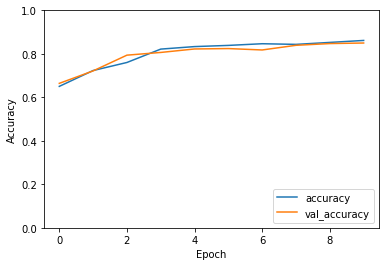

In [ ]:
# The second task was to compare the Transfer learning for the Fashion mnist dataset

source_domain_fashion= densenet(7,'adam',x_train_prim_fmnist,y_train_prim_fmnist,10,x_test_prim_fmnist,y_test_prim_fmnist)

In [ ]:
#source_domain_fashion.trainable = True # allows all the parameters to be trainable
source_domain_fashion.trainable = False # Prevents the parameters of the layers from getting trained again(Freezing parameters)
base_inputs = source_domain_fashion.layers[0].input
base_outputs = source_domain_fashion.layers[-2].output
target_output = tf.keras.layers.Dense(3)(base_outputs)
target_model_fashion = tf.keras.Model(inputs = base_inputs, outputs = target_output)
print(target_model_fashion.summary())

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________

In [ ]:
# Performing Transfer learning with limited trainable parameters
target_model_fashion.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model_fashion.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
563/563 [==============================] - 61s 108ms/step - loss: 0.1012 - accuracy: 0.9663 - val_loss: 0.1156 - val_accuracy: 0.9617
Epoch 2/5
563/563 [==============================] - 56s 100ms/step - loss: 0.0914 - accuracy: 0.9689 - val_loss: 0.1010 - val_accuracy: 0.9677
Epoch 3/5
563/563 [==============================] - 57s 101ms/step - loss: 0.0872 - accuracy: 0.9696 - val_loss: 0.1969 - val_accuracy: 0.9420
Epoch 4/5
563/563 [==============================] - 56s 100ms/step - loss: 0.0811 - accuracy: 0.9718 - val_loss: 0.0889 - val_accuracy: 0.9740
Epoch 5/5
563/563 [==============================] - 64s 114ms/step - loss: 0.0860 - accuracy: 0.9706 - val_loss: 0.1320 - val_accuracy: 0.9647


In [ ]:
# training model for 3 classes without limited trainable parameters
target_model_fashion.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model_fashion.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
563/563 [==============================] - 183s 326ms/step - loss: 0.1333 - accuracy: 0.9583 - val_loss: 0.0681 - val_accuracy: 0.9753
Epoch 2/5
563/563 [==============================] - 190s 338ms/step - loss: 0.0594 - accuracy: 0.9779 - val_loss: 0.0784 - val_accuracy: 0.9743
Epoch 3/5
563/563 [==============================] - 191s 339ms/step - loss: 0.0474 - accuracy: 0.9833 - val_loss: 0.0648 - val_accuracy: 0.9787
Epoch 4/5
563/563 [==============================] - 191s 339ms/step - loss: 0.0415 - accuracy: 0.9844 - val_loss: 0.0605 - val_accuracy: 0.9790
Epoch 5/5
563/563 [==============================] - 191s 339ms/step - loss: 0.0354 - accuracy: 0.9873 - val_loss: 0.0677 - val_accuracy: 0.9793


### Transfer Learning with unfrozen 3rd block of the denseNet

In [ ]:
#source_domain_fashion.trainable = True # allows all the parameters to be trainable
source_domain_fashion.trainable = False # Prevents the parameters of the layers from getting trained again(Freezing parameters)
base_inputs = source_domain_fashion.layers[0].input
base_outputs = source_domain_fashion.layers[-12].output

layer1 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(base_outputs)
layer2 = tf.keras.layers.concatenate([base_outputs,layer1])
layer3 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(layer2)
layer4 = tf.keras.layers.concatenate([layer2,layer3]) 
layer5= tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(layer4)
layer6= tf.keras.layers.concatenate([layer4,layer5])
layer7= tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(layer6)
layer8= tf.keras.layers.concatenate([layer6,layer7])

#classifictaion layer
layer9 = tf.keras.layers.AvgPool2D(2,strides=2)(layer8)
layer10 = tf.keras.layers.Flatten()(layer9)
output = tf.keras.layers.Dense(3,activation='softmax')(layer10)
target_model_fashion = tf.keras.Model(inputs = base_inputs, outputs = output)
print(target_model_fashion.summary())

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________

In [ ]:
target_model_fashion.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model_fashion.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
565/565 [==============================] - 74s 131ms/step - loss: 0.5536 - accuracy: 0.9982 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 2/5
565/565 [==============================] - 65s 116ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 3/5
565/565 [==============================] - 65s 115ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 4/5
565/565 [==============================] - 69s 122ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 5/5
565/565 [==============================] - 65s 116ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000


### Task Summary

| S.no | Model                              | Dataset              | Trainable Parameters | Training Accuracy(%) | Testing Accuracy(%) | Approx Time(sec/Epoch) | Steps untill convergence | Remarks                                                |
|------|------------------------------------|----------------------|----------------------|----------------------|---------------------|------------------------|--------------------------|--------------------------------------------------------|
| 1.a  | Densenet Source                    | Mnist Digit Source   | 52857                | 96.28                | 96.44               | 421                    | 3                        | Training on 7 classes                                  |
| 1.b  | Densenet without Transfer Learning | Mnist Digit Target   | 49361                | 99.24                | 99.10               | 182                    | 4                        | Training on 3 classes without transfer learning        |
| 1.c  | Densenet with Transfer Learning    | Mnist Digit Target   | 2622                 | 96.87                | 91.66               | 58                     | 5                        | Freezing all the layers but final classification layer |
| 2.a  | Densenet Source                    | Fashion Mnist Source | 52857                | 86.17                | 84.99               | 431                    | 10                       | Training on 7 classes                                  |
| 2.b  | Densenet without Transfer Learning | Fashion Mnist Target | 49361                | 98.73                | 97.93               | 185                    | 3                        | Training on 3 target class without transfer learning   |
| 2.c  | Densenet with Transfer Learning    | Fashion Mnist Target | 2622                 | 97.18                | 96.47               | 56                     | 3                        | Freezing all layers but final classification layer     |
| 3.a  | Densenet with layer unfreeze       | Fashion Mnist Target | 34686                | 100.00               | 100.00              | 65                     | 2                        | The last block of the densenet was trained completely  |

* For the completion of the task DenseNet was selected with 3 blocks and 4 layers in each block.

* From the experiments performed, it was observed that with the help of transfer learning(Freezing layers of source model) trainable parameters reduced significantly. This reduced the excution time of the training.

* Learning on Mnist dataset(Digit and Fashion) were equivalently effective and resulted in higher accuracy.

* For the last part, the last block of the denseNet was allowed to train for the target dataset. This resulted in very high accuracy for both training and testing accuracy.


# Task 4: Introspection
This task was included as Bonus task in Assignment 10.
If you have already submitted it then, please simply copy it in your solution here.
You will implement gradient-based model analysis both for creating saliency maps (local) and for feature visualization (global). You can adapt your implementation of the adversarial examples of Assignment 10 and also take inspiration from the [DeepDream](https://www.tensorflow.org/tutorials/generative/deepdream) tutorial

You can use any Cifar10 or MNIST Model, e.g. from the tasks before.

## 4.0 Assignment 10 Already Submitted - No Bonus Task
One Adversarial Example Generated at variying levels of the Adversarial Impact Value. [0.2,1]

### ASSIGNMENT 10  - Fooling Neural Networks

Neural Network with Introspection

Pawan Kumar: 224230

Raj Rajeshwari Prasad: 224237

Sesha Sai Kiran Bhavaraju: 224160


###Own Model, CNN, pre implemented, very slow to train. - Dropped

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
np.random.seed(42)

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

train_labels = train_labels.reshape((-1))
train_data= tf.data.Dataset.from_tensor_slices((train_images.reshape([-1,32,32,3]).astype(np.float32)/255, train_labels.astype(np.int32)))

train_data= train_data.shuffle(buffer_size=60000).batch(128).repeat()

test_labels = test_labels.reshape((-1))
test_data = tf.data.Dataset.from_tensor_slices((test_images.reshape([-1,32,32,3]).astype(np.float32)/255, test_labels.astype(np.int32))).batch(10000)

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
model6 = models.Sequential()
model6.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),padding='SAME'))
model6.add(layers.MaxPool2D((2,2)))                                                     
model6.add(layers.Conv2D(128, kernel_size=3,padding='SAME', activation='relu'))       
model6.add(layers.MaxPool2D((2,2)))                                                     
model6.add(layers.Conv2D(256, kernel_size=3,padding='SAME' ,activation='relu'))             
model6.add(layers.Flatten())                                                            
model6.add(layers.Dense(64,activation='relu'))                                              
model6.add(layers.Dense(10))                                                           

model6.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model6.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model6(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model6(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 1.264050006866455 , Training Accuracy: 0.5546875
Loss: 1.1759353876113892 , Training Accuracy: 0.609375
Loss: 1.2471470832824707 , Training Accuracy: 0.515625
Loss: 1.1104233264923096 , Training Accuracy: 0.5703125
Loss: 0.8924821615219116 , Training Accuracy: 0.6875
Loss: 0.9390477538108826 , Training Accuracy: 0.6796875
Loss: 0.9370617866516113 , Training Accuracy: 0.703125
Loss: 0.8309849500656128 , Training Accuracy: 0.734375
Loss: 0.675921618938446 , Training Accuracy: 0.734375
Loss: 0.694970428943634 , Training Accuracy: 0.7734375
Loss: 0.7328662276268005 , Training Accuracy: 0.734375
Loss: 0.6669101715087891 , Training Accuracy: 0.7578125
Loss: 0.6293274164199829 , Training Accuracy: 0.7890625
Loss: 0.7748757600784302 , Training Accuracy: 0.75
Loss: 0.7090858221054077 , Training Accuracy: 0.8125
Loss: 0.5073384046554565 , Training Accuracy: 0.8359375
Loss: 0.39372819662094116 , Training Accuracy: 0.8828125
Loss: 0.6169148683547974 , Training Accuracy: 0.7265625


### Adversial Example - Pretrained CNN on ~ 15 Mil Images
Adversial Examples : Examples Created to fool the neural networks.
We create these examples by adding noise to the input image. The noise is added with Fast Gragient Sign Computation using the formula : 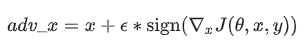

adv_x = Adversarial example created.

x: Input image.

y: Original Input Label.

Epsilon: Parameter to control the changes are small.

Theta : Model Learables

**J : Loss typically constructed just with respect to labels and logits, but here gradients are with restpect to Input image as well. This is because we need to maximise loss in this attack. We achieve by calsculating how each pixel contributes to loss and adding that value back. **

Here classification method or the model architechture plays an important role so trying to fool a pretrained model should give us better results.

In [ ]:
#Pretrained Convolutional Neural Network for mobile vision applications
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

#image pre processing
image_path = tf.keras.utils.get_file('B_Swan.jpg', 'https://upload.wikimedia.org/wikipedia/commons/2/21/Zwarte_zwaan_black_swan.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = tf.cast(image, tf.float32)
image = tf.keras.applications.mobilenet_v2.preprocess_input(tf.image.resize(image, (224, 224)))
image = image[None, ...]

#predicts the image in terms of predictions of the imagenet classes. 
image_probs = pretrained_model.predict(image)

#### Displaying the input image

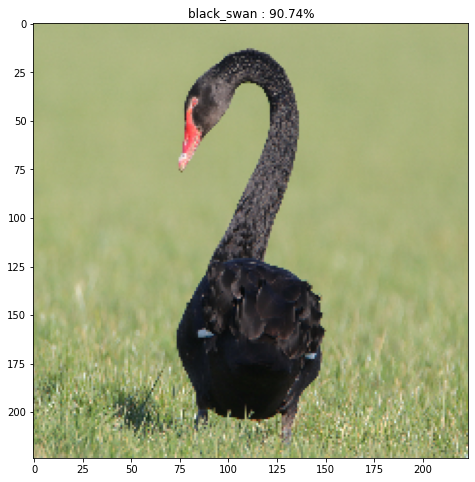

In [ ]:
#displaying the image
plt.figure()
plt.imshow(image[0]*0.5+0.5)
_, image_class, class_confidence = decode_predictions(image_probs, top=1)[0][0]
plt.title('{} : {:.2f}%'.format(image_class, class_confidence*100))
plt.show()

####Creating the Adversarial samples

In [ ]:
def create_gradient(input_image, input_label):
  with tf.GradientTape() as tape:
    #watching the input image
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)
  
  #computing gradients with respect to the imput image
  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad

# Get the actual input label of the image. Black_Swan label is 100
label = tf.one_hot(100, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

loss_object = tf.keras.losses.CategoricalCrossentropy()
gradients = create_gradient(image, label)

plt.title('{}'.format('Initial Noise'))
plt.imshow(gradients[0]*0.5+0.5)

#### At Adversarial-Impact value 0 : Should be original input image

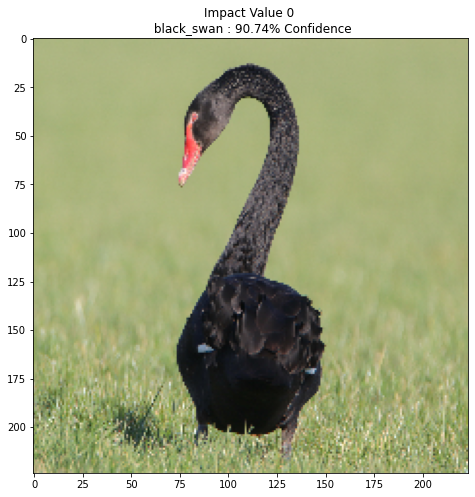

In [ ]:
adv_x = image + 0*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 0',label, confidence*100))
plt.show()

#### At Adversarial-Impact value 0.05

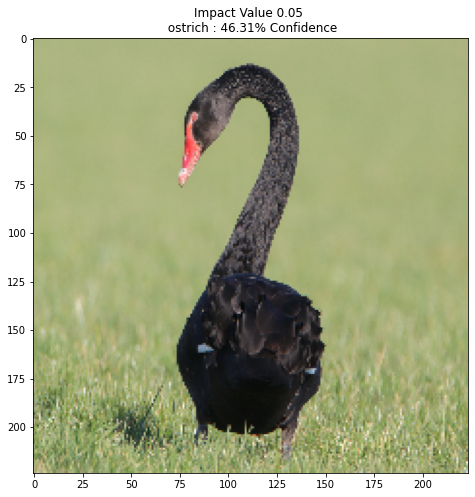

In [ ]:
adv_x = image + 0.05*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 0.05',label, confidence*100))
plt.show()

#### At Adversarial-Impact value 0.1

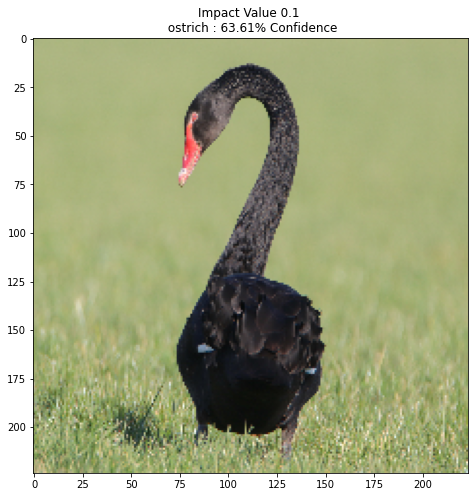

In [ ]:
adv_x = image + 0.1*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 0.1',label, confidence*100))
plt.show()

#### At Adversarial-Impact value 0.2

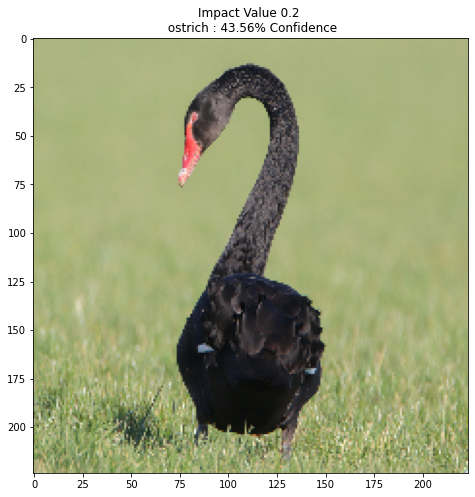

In [ ]:
adv_x = image + 0.2*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 0.2',label, confidence*100))
plt.show()

#### At Adversarial-Impact value 0.4

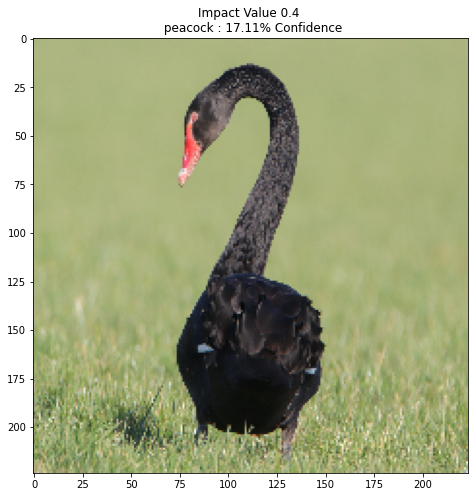

In [ ]:
adv_x = image + 0.4*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 0.4',label, confidence*100))
plt.show()

#### At Adversarial-Impact value 0.6

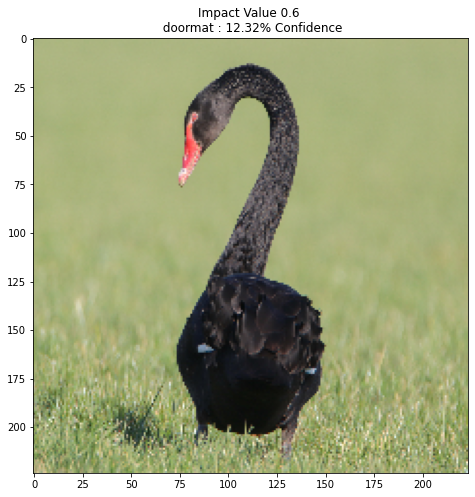

In [ ]:
adv_x = image + 0.6*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 0.6',label, confidence*100))
plt.show()

#### At Adversarial-Impact value 1.0

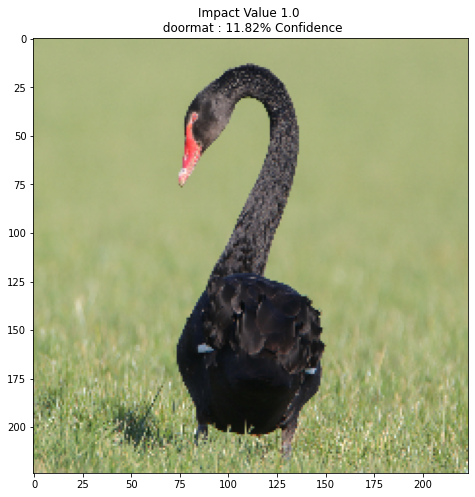

In [ ]:
adv_x = image + 1.0*gradients
adv_x = tf.clip_by_value(adv_x, -1, 1)
_, label, confidence = decode_predictions(pretrained_model.predict(adv_x), top=1)[0][0]
plt.figure()
plt.imshow(image[0]*0.5+0.5)
plt.title('{} \n {} : {:.2f}% Confidence'.format('Impact Value 1.0',label, confidence*100))
plt.show()

### Experiments (Adversarial Training) - Not Tried


## 4.1 gradient-based saliency map (sensitivity analysis)

* Run a batch of inputs through the trained model.
Wrap this in a GradientTape where you watch the input batch.
(batch size can be 1 if you just like to produce a single saliency map)
* Compute the gradient for a particular logit or its softmax output with respect to the input.
This tells us how a change in each input pixel would affect the class output.
* This already gives you a batch of gradient-based saliency maps!
Plot the saliency map next to the original image or superimpose it.

* Do the saliency maps seem to make sense? 

Ans: Saliency maps according to our understanding, is a map where pixels in the images are differentiated based on their contribution to the class output.

* How would you interpret them?

Ans: Saliency maps are visualized in our task as a ranking visualized by a color gradient. The maps in our case make sense becasue the pixels corresponding to the class output are generally centered around the object in the image itself. Hence we expect a gradient change in those specific pixel values with respect to the class value. We see the pixels contributing the most to the class value are the ones which represent the object itself. For instance consider the black swan example below. The pixels on the swan contribute most where as the pixels which are in the background arent that contributing.

Hint: It makes sense to take the sign of the gradient into account when interpreting them.
Negative gradients indicate a decrease in output value, positive gradients an increase.

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
np.random.seed(42)

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

#Pretrained Convolutional Neural Network for mobile vision applications
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

#image pre processing
image_path = tf.keras.utils.get_file('B_Swan.jpg', 'https://upload.wikimedia.org/wikipedia/commons/2/21/Zwarte_zwaan_black_swan.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = tf.cast(image, tf.float32)
image = tf.keras.applications.mobilenet_v2.preprocess_input(tf.image.resize(image, (224, 224)))
image = image[None, ...]

#predicts the image in terms of predictions of the imagenet classes. 
image_probs = pretrained_model.predict(image)

4284416/4284071 [==============================] - 1s 0us/step


40960/35363 [==================================] - 0s 0us/step


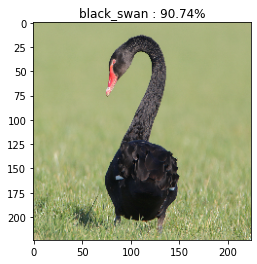

In [ ]:
#displaying the image
plt.figure()
plt.imshow(image[0]*0.5+0.5)
_, image_class, class_confidence = decode_predictions(image_probs, top=1)[0][0]
plt.title('{} : {:.2f}%'.format(image_class, class_confidence*100))
plt.show()

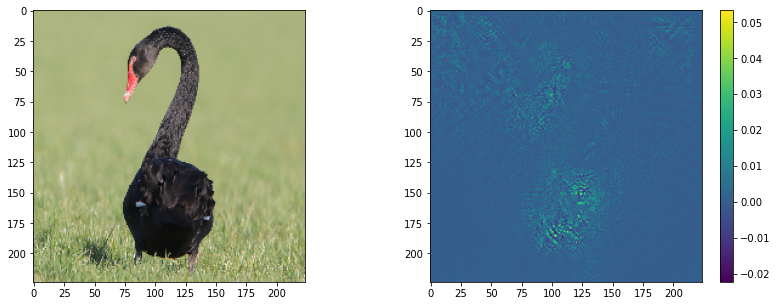

In [ ]:
images = tf.Variable(image, dtype=float)

with tf.GradientTape() as tape:
    pred = pretrained_model(images)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)
dgrad_max_ = np.max(grads, axis=3)[0]

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(image[0]*0.5+0.5)
i = axes[1].imshow(dgrad_max_,alpha=1)
fig.colorbar(i)

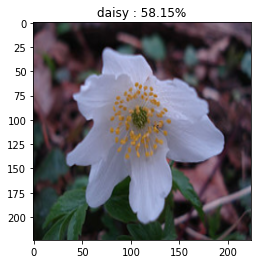

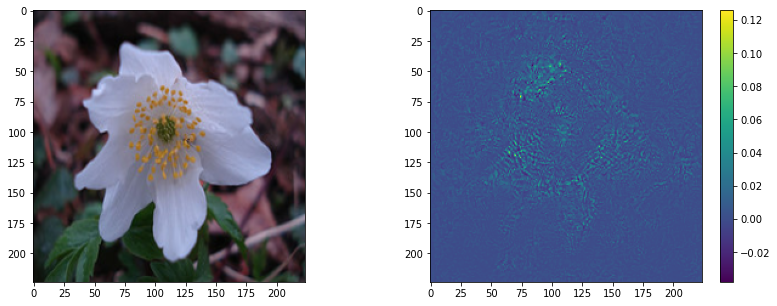

In [ ]:
#image pre processing
image_path = tf.keras.utils.get_file('Flower.jpg', 'http://www.image-net.org/nodes/13/11725821/4d/4d660173663af9469d2ff576672af66e6f59d1c9.thumb')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = tf.cast(image, tf.float32)
image = tf.keras.applications.mobilenet_v2.preprocess_input(tf.image.resize(image, (224, 224)))
image = image[None, ...]

#predicts the image in terms of predictions of the imagenet classes. 
image_probs = pretrained_model.predict(image)

#displaying the image
plt.figure()
plt.imshow(image[0]*0.5+0.5)
_, image_class, class_confidence = decode_predictions(image_probs, top=1)[0][0]
plt.title('{} : {:.2f}%'.format(image_class, class_confidence*100))
plt.show()

images = tf.Variable(image, dtype=float)

with tf.GradientTape() as tape:
    pred = pretrained_model(images)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)
dgrad_max_ = np.max(grads, axis=3)[0]

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(image[0]*0.5+0.5)
i = axes[1].imshow(dgrad_max_,alpha=1)
fig.colorbar(i)

## 4.2 Activation Maximization
Extend the code from 4.1 to create an optimal input for a particular class.

* Add the gradients (i.e. the saliency map) to the input. You should multiply the gradients with a small constant (like a learning rate) to make sure the inputs aren’t changed too much.
* Do multiple update steps to make the input more optimal for the chosen output class.

(I recommend implementing your own update step, but you are allowed to use a keras training loop to optimize the input.)

* Does the resulting input look natural?

Ans: The resulting input does look natural in our case. Although we arent completely sure of the solution, because the Deep Dream Tutorial suggests otherwise. Also we have not used the "tiled" approach to maximise the class activation and generate tzhe ideal input.

* How does the inputs change when applying many steps of optimization?

Ans: We havent applied a multi step input generation strategy but, were more focussed on understanding the saliency maps.

Bonus: Apply regularization strategies to make the optimal input more natural-looking.

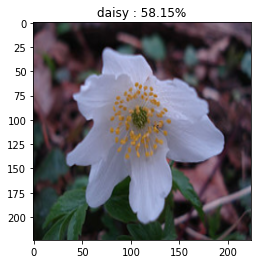

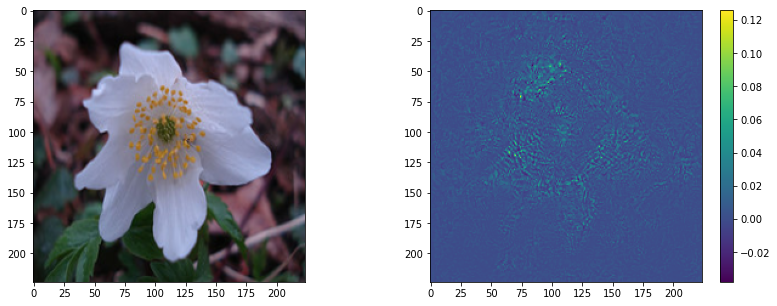

In [ ]:
#image pre processing
image_path = tf.keras.utils.get_file('Flower.jpg', 'http://www.image-net.org/nodes/13/11725821/4d/4d660173663af9469d2ff576672af66e6f59d1c9.thumb')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = tf.cast(image, tf.float32)
image = tf.keras.applications.mobilenet_v2.preprocess_input(tf.image.resize(image, (224, 224)))
image = image[None, ...]

#predicts the image in terms of predictions of the imagenet classes. 
image_probs = pretrained_model.predict(image)

#displaying the image
plt.figure()
plt.imshow(image[0]*0.5+0.5)
_, image_class, class_confidence = decode_predictions(image_probs, top=1)[0][0]
plt.title('{} : {:.2f}%'.format(image_class, class_confidence*100))
plt.show()

images = tf.Variable(image, dtype=float)

with tf.GradientTape() as tape:
    pred = pretrained_model(images)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)
dgrad_max_ = np.max(grads, axis=3)[0]

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(image[0]*0.5+0.5)
i = axes[1].imshow(dgrad_max_,alpha=1)
fig.colorbar(i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


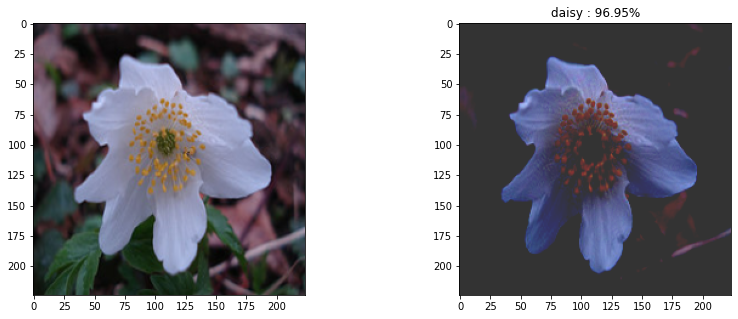

In [ ]:
act_max_img = image + 0.9 *grads
act_image_probs = pretrained_model.predict(act_max_img)

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(image[0]*0.5+0.5)
i = axes[1].imshow(act_max_img[0],alpha=0.8)
_, image_class, class_confidence = decode_predictions(act_image_probs, top=1)[0][0]
plt.title('{} : {:.2f}%'.format(image_class, class_confidence*100))
plt.show()
fig.colorbar(i)

# Task 5: Attention-based Neural Machine Translation
This tasks aims to give you a better practical understanding of Attention mechanisms as they fell short in the Assignments.
In this task, you will implement a simple NMT with attention for a language pair of your choice.
We will follow the corresponding [TF Tutorial on NMT](https://www.tensorflow.org/tutorials/text/nmt_with_attention).

Please **do not use the exemplary English-Spanish example** to reduce temptation of simply copying the tutorial.
You can find data sets [here](http://www.manythings.org/anki/). I recommend to pick a language pair where you understand both languages.
This makes it easier (and more fun) for you to evaluate the results.

Recommendation: Start with a small number of training examples. Use one of the training examples to evaluate whether training worked properly.
Only switch to the complete data set if you’re sure that your code works, because training is quite slow.
Note that many words are out-of-vocabulary (OOV) when using few examples.

Tasks:

* Follow the tutorial and train the model on your chosen language pair (using Bahdanau attention).
* You might need to adapt the preprocessing depending on the language.
* Implement other attention mechanisms and train models with them

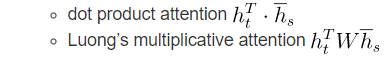

Hint: Storing the models is important, so you don’t need to retrain them all the time.
Also take care to not overwrite model checkpoints when switching from additive to multiplicative attention.

Compare the attention weight plots for some examples between the attention mechanisms.
I recommend to add `,clim=[0,1]` when creating the plot in `ax.matshow(attention, cmap='viridis')` so the colors correspond to the same attention values in different plots.
Note that the tutorial crops off the padding in the attention plot although the decoder can attend to those too.
Do you see qualitative differences in the attention weights between different attention mechanisms?
Do you think that the model attends to the correct tokens in the input language? (if you understand both languages)

Here are a few questions for you to check how well you understood the tutorial.
Please answer them (briefly) in your solution!

* Which parts of the sentence are used as a token? Each character, each word, or are some words split up?

Ans: Each word of a sentence are used as a token. No words are split up by the tokenizer itself. 

* Additional Preprocessing Steps for Devanagari: However the creation of dataset involves employing a procedure for converting UniCode data to ascii which might need some modifications for handling the Devnagari script. The Vovel sounds in the language are split up as characters with a space so we need to not ignore spaces. unidodedata.category() can be 'mn' which corresponds to a space. Also the Hin-English dataset contains three columns with the third column being the source of the translation which should be pruned. Some Special characters needed to be handled separately as well.

* Do the same tokens in different language have the same ID?
e.g. Would the same token index map to the German word die and to the English word die?

Ans: No. The word_indexes are just unique identifiers for each word. The word_indexes are generally numbers and need not be the same.Theyjust facilitate the mapping word -> word_index and word_index -> word.

 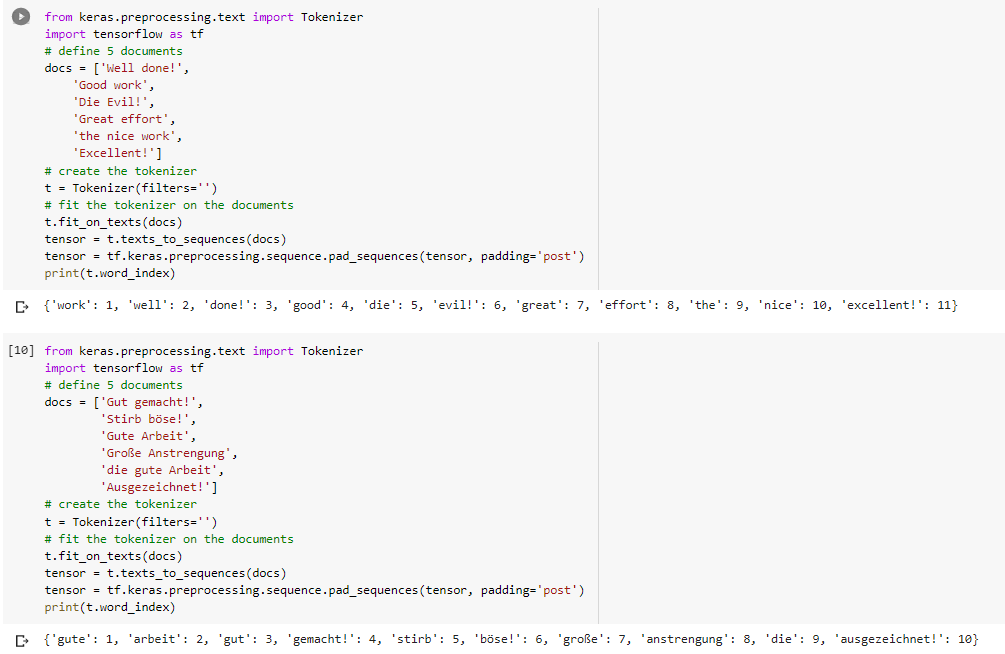 

* What is the relation between the encoder output and the encoder hidden state which is used to initialize the decoder hidden state?
(for the architecture used in the tutorial)

Ans: The relationship between the encoder output, encoder hidden state and the decoder is that the input are passed to the encoder, the obtained encoder hidden state, encoder output, and the decoder input and the are passed to the decoder which then returns the decoder hidden state and the prediction. The decoder input in the above line is the start token. 


* Is the decoder attending to all previous positions, including the previous decoder predictions?

Ans: The decoder computes loss with respect to the predictions in each timestep.
The decoder hidden states are also updated at the same time.

* Does the Encoder output change in different decoding steps?

Ans: No the encoder output doesnt change for different decoding steps. The encoder output is calculated once for one input.

* Does the context vector change in different decoding steps?

Ans: context vector = sum(attention weights * EO, axis = 1). the Attention weights are calculated here, attention weights = softmax(FC(tanh(FC(EO) + FC(H))), axis = 1). The input is passed through an encoder model which gives us the encoder output EO of shape (batch_size, max_length, hidden_size) and the encoder hidden state of shape (batch_size, hidden_size) H. The context vector changes for each predictions and decoder hidden states.

* The decoder uses teacher forcing. Does this mean the time steps can be computed in parallel?

Ans: The Decoder uses teacher forcing to specify the next dec_input. Dec input is required to calculate the predictions and decoder hidden states. The predictions are then used to compute the loss with respect to the target. Parallel execution of all the time steps at once is possible because the decoder hidden state changes for one prediction and the process could include some modifications to compute additive loss with respect to the individual target and the predictions.

* Why is a mask applied to the loss function?

Ans: A mask is applied to the loss function in order to control the change of loss over time. It is also useful to attribute this loss mask as a way to mitigate the effect of Start and End token. The id 0 in the decoder prediction would mean a token index which is not recognized by a word_index. (Not Sure) 

Bonus1: Can you prevent the attention mechanism from attending to padded positions in the sequence?

Bonus2: The tutorial suggests to restore checkpoints for loading a model.
This is inconvenient, because you first need to process the data, build the whole architecture and then initialize it from the checkpoint.
It would be much nicer to simply load a model and run translations with it. Can you find a way to achieve this?

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time


path_to_file = os.path.dirname("/content/drive/My Drive/Colab Notebooks/")+"/hin.txt"

# Converts the unicode file to ascii
def unicode_to_ascii(s):
  # Devnagari can have spaces when characters are split via a normalizers to denote vowels so, no character category is skipped
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != '')


def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())
  w = re.sub(r"([?.!,¿।])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # Needed to make the adaptations to include exemption of ascii characters with hex codes ranging from 0900 to 097F
  # Refer https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)
  #w = re.sub(r"[^a-zA-Zअ-ॡक-ह?.!,¿।ॐ-॰]+", " ", w)
  w = re.sub(r"[^a-zA-Z?.!,¿ऀ-ॿ]+", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

# # Unit Testing
# en_sentence = u"May I borrow this book?"
# hi_sentence = u"अंदर आ जाओ।"
# print(preprocess_sentence(en_sentence))
# print(preprocess_sentence(hi_sentence).encode('utf-8'))

# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, HINDI]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]

  return zip(*word_pairs)

# Needed to remove the last sources column and save as a txt first and then convert it to a UTF-8 compatible text file.
# Unit testing
# en, hi = create_dataset(path_to_file, None)
#print(en[-1])
#print(hi[-1])

def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)
  tensor = lang_tokenizer.texts_to_sequences(lang)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
  return tensor, lang_tokenizer

def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(path, num_examples)
  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)
  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)
# print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)) # 2218 2218 555 555

def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))


class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights
  
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights
  
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

checkpoint_dir = '/content/drive/My Drive/Colab Notebooks/Final Assignment/Task 5/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Input Language; index to word mapping
1 ----> <start>
9 ----> वह
781 ----> समुंदर
17 ----> की
637 ----> ओर
181 ----> चल
40 ----> रहा
18 ----> था
3 ----> ।
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
11 ----> he
22 ----> was
690 ----> walking
1580 ----> toward
4 ----> the
934 ----> sea
3 ----> .
2 ----> <end>
Encoder output shape: (batch size, sequence length, units) (64, 30, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)
Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 30, 1)
Decoder output shape: (batch_size, vocab size) (64, 2318)
Epoch 1 Batch 0 Loss 2.4517
Epoch 1 Loss 1.8548
Time taken for 1 epoch 419.39693117141724 sec

Epoch 2 Batch 0 Loss 1.5497
Epoch 2 Loss 1.5070
Time taken for 1 epoch 376.5469243526459 sec

Epoch 3 Batch 0 Loss 1.4095
Epoch 3 Loss 1.4059
Time taken for 1 epoch 368.8881154060364 sec

Epoch 4 Batch 0 Loss 1.3022
Epoch 4 Loss 1.3104
Time taken for 1 

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: <start> आप कैसे हैं ? <end>
Predicted translation: how are you ? <end> 


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s

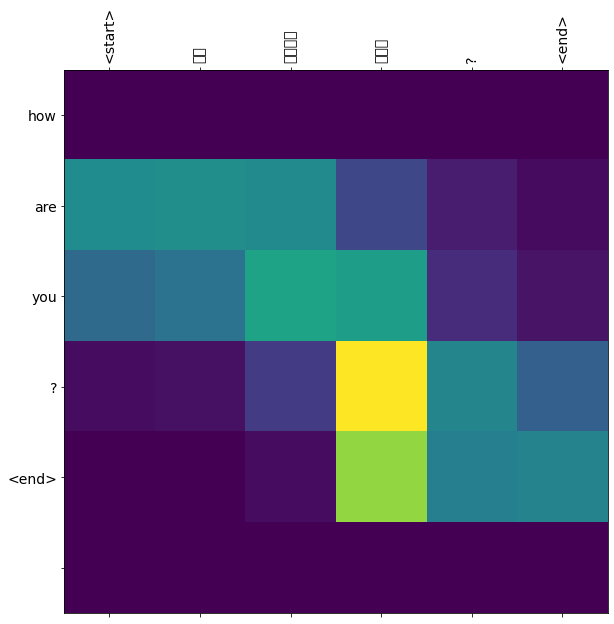

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

translate(u"आप कैसे हैं?")

# Task 6: BERT fine-tuning for classification
To understand practical use of Transformer-based architectures, you will *fine*-tune pre-trained BERT for the downstream task of classification.
Again, we will mainly follow the corresponding [TF Tutorial on BERT fine-tuning](https://www.tensorflow.org/official_models/fine_tuning_bert).

**Sections ‘Saving the model’ and ‘Appendix’ are not necessary for the assignment.**

We will make a few adaptations to the tutorial.

1. The tutorial data set GLUE MRPC is classifying sentence pairs.
In the assignment, please use a data set to classify single sentences.
For example, GLUE itself has such data sets, like COLA or SST2, which are provided as [TFDS](https://www.tensorflow.org/datasets/catalog/glue).
You need to adapt the data preprocessing to be used for this task.
2. The suggested building of the model with `bert.bert_models.classifier_model()` is a very high-level abstraction.
Instead of using this function, take a pre-trained BERT encoder and connect it to a classification model yourself.
This way, you can understand better how the information flow from input through encoder to classifier.

With those adaptations, follow the tutorial and fine-tune a pre-trained BERT on classification.
In addition to the evaluation based on training/evaluation set, run queries you made yourself to test generalization of the classifier.

Comment: I think there is a bug in `result = tf.argmax(result).numpy()` - the argmax should be over `axis=1`. (try processing more than 2 sequences)

Here are a few questions for you to check how well you understood the tutorial.
Please answer them (briefly) in your solution!

* What is the tutorial classifying when using the GLUE MRPC data set?

Ans: The tutorial is performing  the fine tuning of  pretrained Bert language Model to perform the learning on MRPC dataset which consists sequence of 2 sentences and model classifies whether second sentence is a paraphrase of first setence or not having the class labels as equivalent or not equivalent and at the time of inference it checks on a custom user defined example to check the prediction of the fine tuned model.

* In addition to the input itself, the tutorial feeds two binary tensors for input mask and input type to the model, Is this necessary for the data set single sentence classification?

Ans: Since the orignal bert model was trained for MLM and NSP tasks ,the pre processing steps for Bert language model requires the 3 input sequences for training which includes Token ids , Mask ids, Segment ids(input_type_ids), since the Masked Language Modelling replaces a certain number of tokens in the sequence with Masked values and allows the model to predict for the masked tokens and in the case of Single sentence sequences we could take the segment id as only 0 , therefore it is necessary to feed the two binary tensors and the pretrained bert encoder are also trained on the same input tensors , so while importing the encoder for fine tuning will also require us to pass the same dependancies while constructing our low level encoder.

* How does the tokenization in BERT differ from the one in the previous Task 5?

Ans: The tokenizer is the incharge of preparing the inputs for a model , the tokenizer used in Bert training is the full python implimentation flavor(FullTokenizer) which is a Wordpiece style tokenizer which keeps the vocabulary size small and splitting more complex words into smaller in dictionary words and performs the lowercasing of the sentences as well, the tokenizer used is cannot be directly plugged into the model as used in the Neural machine translation. The Special tokens used in Bert language Model are the [Sep] and the [cls]  which allows us to  convert the input data into an appropriate format so that each sentence can be sent to the pre-trained model to obtain the corresponding embedding.

* What is a [CLS] token and what is it used for?

Ans: **[CLS]** *token is inserted at the beggining of the first sentence which stands for classification ,in the case of Single sentence classification 
we can use the output of the first toke [CLS] and feed it to  a linear layer followed by sigmoid activation, that performs the actual classification.

* Which part of the BERT encoding is used for the classification? Does your answer match the output shape of the encoder?

Ans: The processor and the tokenizer of the bert encoding is used to create the input data in the format which could be fed for the classification.

* Are the BERT encoder weights also fine-tuned to the task?

Ans: The initial encoder weights are randomly inititalized where they are restored from the previous checkpoint and are learned accordingly to the task



In [ ]:
pip install -q tf-models-nightly

     |████████████████████████████████| 1.0MB 3.4MB/s 
     |████████████████████████████████| 1.1MB 15.6MB/s 
     |████████████████████████████████| 390.2MB 42kB/s 
     |████████████████████████████████| 36.6MB 84kB/s 
     |████████████████████████████████| 174kB 58.3MB/s 
     |████████████████████████████████| 276kB 50.7MB/s 
     |████████████████████████████████| 358kB 47.6MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 10.1MB 46.8MB/s 
     |████████████████████████████████| 460kB 50.9MB/s 


In [ ]:
pip install -q tf-nightly


In [ ]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.5MB/s 


In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
from official.modeling import tf_utils
from official import nlp
from official.nlp import bert
# Load the required submodules
import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks
#from bert import data


In [ ]:
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/keras_bert/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)

#Pre trained Bert encoder
hub_url_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
glue, info = tfds.load('glue/cola', with_info=True,
                       batch_size=-1)
hub_encoder = hub.KerasLayer(hub_url_bert, trainable=True)
print(f"The Hub encoder has {len(hub_encoder.trainable_variables)} trainable variables")

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/glue/cola/1.0.0.incomplete00Z39F/glue-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/glue/cola/1.0.0.incomplete00Z39F/glue-validation.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/glue/cola/1.0.0.incomplete00Z39F/glue-test.tfrecord
Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/cola/1.0.0. Subsequent calls will reuse this data.
The Hub encoder has 199 trainable variables


## Loading the COLA Dataset

In [ ]:
glue, info = tfds.load('glue/cola', with_info=True,
                       batch_size=-1)

In [ ]:
tf.print('Keys of the dataset', glue.keys())
tf.print('Label Names' , info.features['label'].names)


Keys of the dataset ['test', 'train', 'validation']
Label Names ['unacceptable', 'acceptable']


In [ ]:
glue_train = glue['train']
for key, value in glue_train.items():
  for i in range(5):
    print(f"{key:9s}: {value[i].numpy()}")

idx      : 1680
idx      : 1456
idx      : 4223
idx      : 4093
idx      : 7111
label    : 1
label    : 1
label    : 1
label    : 1
label    : 1
sentence : b'It is this hat that it is certain that he was wearing.'
sentence : b'Her efficient looking up of the answer pleased the boss.'
sentence : b'Both the workers will wear carnations.'
sentence : b'John enjoyed drawing trees for his syntax homework.'
sentence : b'We consider Leslie rather foolish, and Lou a complete idiot.'


## Initializing the Bert Tokenizer

In [ ]:
# Set up tokenizer to generate Tensorflow dataset
tokenizer = bert.tokenization.FullTokenizer(
    vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
     do_lower_case=True)
#Sample Tokenizing Words
tokens = tokenizer.tokenize("This tutorial is for Bert Fine Tuning")
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
print("Vocab size:", len(tokenizer.vocab))

['this', 'tutor', '##ial', 'is', 'for', 'bert', 'fine', 'tuning']
[2023, 14924, 4818, 2003, 2005, 14324, 2986, 17372]
Vocab size: 30522


Preprocessing Steps for Bert Language Model:

1. *Token ids*: for every token in the sentence. We restore it from the BERT vocab dictionary
2. *Mask ids*: MLM(Masked Language Modelling) replaces a certain number of tokens in a sequence by [Mask] tokens and the model predicts the masked tokens
3. *Segment ids*: 0 for single sentence sequences , 1 if there are 2 sentences in a sequence 

In [ ]:
def encode_sentence(s, tokenizer):
   tokens = list(tokenizer.tokenize(s))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

def bert_encode(glue_dict, tokenizer):
  num_examples = len(glue_dict["sentence"])
  sentence = tf.ragged.constant([
      encode_sentence(s, tokenizer)
      for s in np.array(glue_dict["sentence"])])
                                

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence.shape[0]
  input_word_ids = tf.concat([cls, sentence], axis=-1)
  input_mask = tf.ones_like(input_word_ids).to_tensor()
  type_cls = tf.zeros_like(cls)
  type_s1 = tf.zeros_like(sentence)
  input_type_ids = tf.concat(
      [type_cls, type_s1], axis=-1).to_tensor()

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}
  return inputs

glue_train = bert_encode(glue['train'], tokenizer)
glue_train_labels = glue['train']['label']

glue_validation = bert_encode(glue['validation'], tokenizer)
glue_validation_labels = glue['validation']['label']

glue_test = bert_encode(glue['test'], tokenizer)
glue_test_labels  = glue['test']['label']

for key, value in glue_train.items():
  print(f'{key:15s} shape: {value.shape}')
print(f'glue_train_labels shape: {glue_train_labels.shape}')

input_word_ids  shape: (8551, 47)
input_mask      shape: (8551, 47)
input_type_ids  shape: (8551, 47)
glue_train_labels shape: (8551,)


**‘input_word_ids’** *contains the integer sequences of the input sentences. The integers 101 and 102 are special tokens. We add them to both the sequences, and 0 represents the padding token.*

**‘input_mask’** *contains 1’s and 0’s. It tells the model to pay attention to the tokens corresponding to the mask value of 1 and ignore the rest.*

## Processing and Re encoding the dataset

In [ ]:
processor = nlp.data.classifier_data_lib.TfdsProcessor(
    tfds_params="dataset=glue/cola,text_key=sentence",
    process_text_fn=bert.tokenization.convert_to_unicode)

# Set up output of training and evaluation Tensorflow dataset
train_data_output_path="./mrpc_train.tf_record"
eval_data_output_path="./mrpc_eval.tf_record"
batch_size = 32
eval_batch_size = 32
# The maximum length of a input sequence
max_len = 128
# The labels of the two classes [(0 = Unacceptable) or (1 = acceptable)]
all_labels = ["0", "1"]
# for for single sentence classification, set pair = False
pair = True

input_meta_data = (
    nlp.data.classifier_data_lib.generate_tf_record_from_data_file(
      processor=processor,
      data_dir=None,  # It is `None` because data is from tfds, not local dir.
      tokenizer=tokenizer,
      train_data_output_path=train_data_output_path,
      eval_data_output_path=eval_data_output_path,
      max_seq_length=max_len))

In [ ]:
def create_classifier_dataset(file_path, seq_length, batch_size, is_training):
  """Creates input dataset from (tf)records files for train/eval."""
  dataset = tf.data.TFRecordDataset(file_path)
  if is_training:
    dataset = dataset.shuffle(100)
    dataset = dataset.repeat()

  def decode_record(record):
    name_to_features = {
      'input_ids': tf.io.FixedLenFeature([seq_length], tf.int64),
      'input_mask': tf.io.FixedLenFeature([seq_length], tf.int64),
      'segment_ids': tf.io.FixedLenFeature([seq_length], tf.int64),
      'label_ids': tf.io.FixedLenFeature([], tf.int64),
    }
    return tf.io.parse_single_example(record, name_to_features)

  def _select_data_from_record(record):
    x = {
        'input_word_ids': record['input_ids'],
        'input_mask': record['input_mask'],
         'input_type_ids': record['segment_ids']
    }
    y = record['label_ids']
    return (x, y)

  dataset = dataset.map(decode_record,
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)
  dataset = dataset.map(
      _select_data_from_record,
      num_parallel_calls=tf.data.experimental.AUTOTUNE)
  dataset = dataset.batch(batch_size, drop_remainder=is_training)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

# Set up batch sizes
batch_size = 32
eval_batch_size = 32
max_seq_length = 128

# Return Tensorflow dataset
training_dataset = create_classifier_dataset(
    train_data_output_path,
    input_meta_data['max_seq_length'],
    batch_size,
    is_training=True)

evaluation_dataset = create_classifier_dataset(
    eval_data_output_path,
    input_meta_data['max_seq_length'],
    eval_batch_size,
    is_training=False)

tf.print(training_dataset)
training_dataset.element_spec

<PrefetchDataset shapes: ({input_word_ids: (32, 128), input_mask: (32, 128), input_type_ids: (32, 128)}, (32,)), types: ({input_word_ids: tf.int64, input_mask: tf.int64, input_type_ids: tf.int64}, tf.int64)>


({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int64, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int64, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int64, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int64, name=None))

In [ ]:
import json

bert_config_file = os.path.join(gs_folder_bert, "bert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())
bert_config = bert.configs.BertConfig.from_dict(config_dict)
config_dict

{'attention_probs_dropout_prob': 0.1,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 30522}

In [ ]:
result = hub_encoder(
    inputs=[glue_train['input_word_ids'][:10],
            glue_train['input_mask'][:10],
            glue_train['input_type_ids'][:10],],
    training=False,
)

print("Pooled output shape:", result[0].shape)
print("Sequence output shape:", result[1].shape)

Pooled output shape: (10, 768)
Sequence output shape: (10, 47, 768)


## Low Level Model Building

In [ ]:
transformer_config = config_dict.copy()
# You need to rename a few fields to make this work:
transformer_config['attention_dropout_rate'] = transformer_config.pop('attention_probs_dropout_prob')
transformer_config['activation'] = tf_utils.get_activation(transformer_config.pop('hidden_act'))
transformer_config['dropout_rate'] = transformer_config.pop('hidden_dropout_prob')
transformer_config['initializer'] = tf.keras.initializers.TruncatedNormal(
          stddev=transformer_config.pop('initializer_range'))
transformer_config['max_sequence_length'] = transformer_config.pop('max_position_embeddings')
transformer_config['num_layers'] = transformer_config.pop('num_hidden_layers')
transformer_config

{'activation': <function official.modeling.activations.gelu.gelu>,
 'attention_dropout_rate': 0.1,
 'dropout_rate': 0.1,
 'hidden_size': 768,
 'initializer': <tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal at 0x7f1eabc08eb8>,
 'intermediate_size': 3072,
 'max_sequence_length': 512,
 'num_attention_heads': 12,
 'num_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 30522}

In [ ]:
manual_encoder = nlp.modeling.networks.TransformerEncoder(**transformer_config)
checkpoint = tf.train.Checkpoint(model=manual_encoder)
checkpoint.restore(
    os.path.join(gs_folder_bert, 'bert_model.ckpt')).assert_consumed()

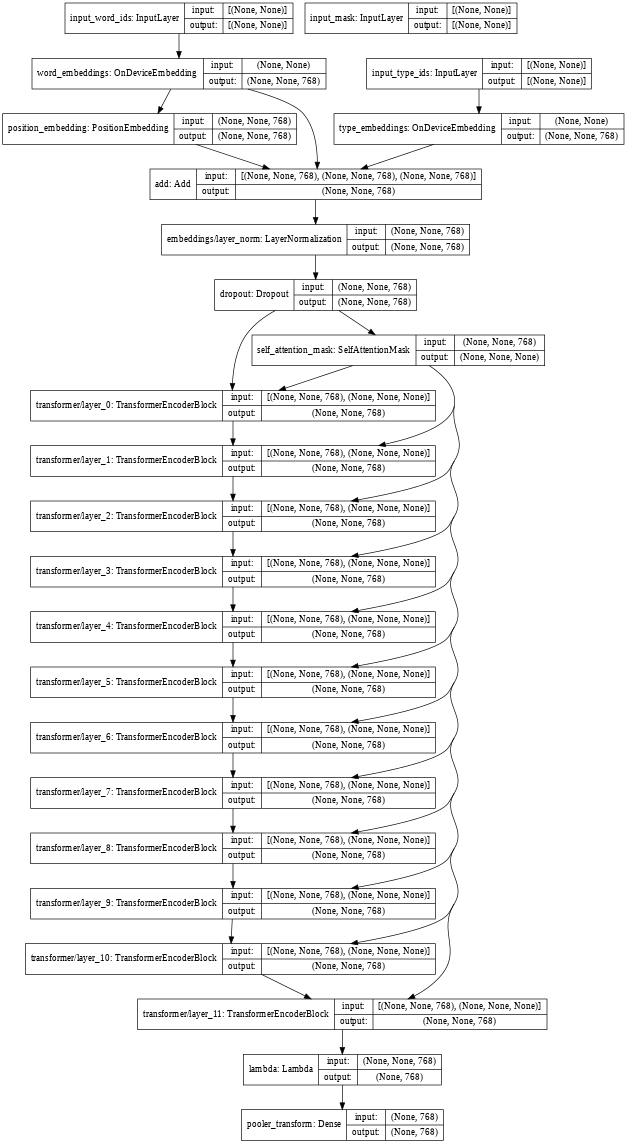

In [ ]:
tf.keras.utils.plot_model(manual_encoder, show_shapes=True, dpi=48)

In [ ]:
my_examples = bert_encode(
    glue_dict = {
        'sentence':[
            '"He remains characteristically confident and optimistic."',
            'Look I fine tuned BERT.'],
        'sentence':[
            'It mostly rains on the flat lands of Spain.'],
    },
    tokenizer=tokenizer)

tf.print(my_examples)
result = manual_encoder(my_examples, training=True)

print("Sequence output shape:", result[0].shape)
print("Pooled output shape:", result[1].shape)

{'input_mask': [[1 1 1 ... 1 1 1]], 'input_type_ids': [[0 0 0 ... 0 0 0]], 'input_word_ids': [[101 2009 3262 ... 3577 1012 102]]}
Sequence output shape: (1, 12, 768)
Pooled output shape: (1, 768)


In [ ]:
bert_classifier, bert_encoder = bert.bert_models.classifier_model(
    bert_config, num_labels=2)

manual_classifier = nlp.modeling.models.BertClassifier(
        bert_encoder,
        num_classes=2,
        dropout_rate=transformer_config['dropout_rate'],
        initializer=tf.keras.initializers.TruncatedNormal(
          stddev=bert_config.initializer_range))

manual_classifier(my_examples, training=True).numpy()

array([[-0.2992846 , -0.01916229]], dtype=float32)

In [ ]:
epochs = 2
batch_size = 32
eval_batch_size = 32
train_data_size = len(glue_train_labels)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)

## Training the Model

In [ ]:
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy', dtype=tf.float32)]
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#Bert Encoder from the classifier_model()
bert_encoder.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics)

bert_encoder.fit(
      glue_train, glue_train_labels,
      validation_data=(glue_validation, glue_validation_labels),
      batch_size=32,
      epochs=epochs)

Epoch 1/2
268/268 [==============================] - 3840s 14s/step - loss: 7.5220 - transformer/layer_11_loss: 1.9710 - pooler_transform_loss: 5.5510 - transformer/layer_11_accuracy: 0.5189 - pooler_transform_accuracy: 0.4851 - val_loss: 5.3586 - val_transformer/layer_11_loss: 0.6382 - val_pooler_transform_loss: 4.7204 - val_transformer/layer_11_accuracy: 0.6913 - val_pooler_transform_accuracy: 0.6913
Epoch 2/2
268/268 [==============================] - 3789s 14s/step - loss: 5.3822 - transformer/layer_11_loss: 0.6671 - pooler_transform_loss: 4.7151 - transformer/layer_11_accuracy: 0.6675 - pooler_transform_accuracy: 0.6506 - val_loss: 5.3196 - val_transformer/layer_11_loss: 0.6249 - val_pooler_transform_loss: 4.6947 - val_transformer/layer_11_accuracy: 0.6913 - val_pooler_transform_accuracy: 0.6913


In [ ]:
# Low Level Model fitting Encoder on top of classification
manual_classifier.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics)

manual_classifier.fit(
      glue_train, glue_train_labels,
      validation_data=(glue_validation, glue_validation_labels),
      batch_size=32,
      epochs=epochs)

Epoch 1/2
268/268 [==============================] - 3804s 14s/step - loss: 0.6097 - accuracy: 0.7060 - val_loss: 0.6180 - val_accuracy: 0.6913
Epoch 2/2
268/268 [==============================] - 3792s 14s/step - loss: 0.6138 - accuracy: 0.7043 - val_loss: 0.6202 - val_accuracy: 0.6913


In [ ]:
manual_classifier(my_examples, training=False).numpy()

array([[-0.42065534,  0.5503315 ]], dtype=float32)

In [ ]:
result = bert_classifier(my_examples, training=False)
result = tf.argmax(result).numpy()
result
np.array(info.features['label'].names)[result]

array(['unacceptable', 'unacceptable'], dtype='<U12')

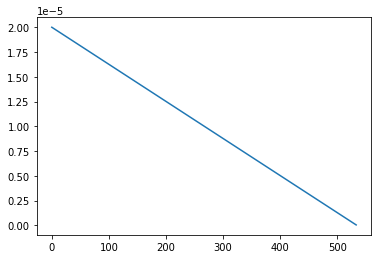

In [ ]:
decay_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
      initial_learning_rate=2e-5,
      decay_steps=num_train_steps,
      end_learning_rate=0)

plt.plot([decay_schedule(n) for n in range(num_train_steps)])

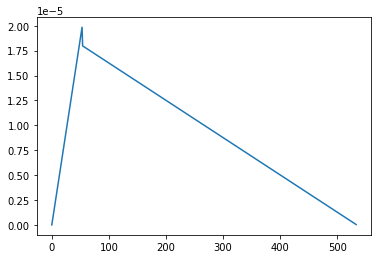

In [ ]:
warmup_steps = num_train_steps * 0.1
warmup_schedule = nlp.optimization.WarmUp(
        initial_learning_rate=2e-5,
        decay_schedule_fn=decay_schedule,
        warmup_steps=warmup_steps)

# The warmup overshoots, because it warms up to the `initial_learning_rate`
# following the original implementation. You can set
# `initial_learning_rate=decay_schedule(warmup_steps)` if you don't like the
# overshoot.
plt.plot([warmup_schedule(n) for n in range(num_train_steps)])

# Task 7: What did you learn? (Individual)
This task has to be done by each person in the team!
After you have finished the other tasks, please share your experience with this assignment.

* Which findings were just showing what you already expected?

Ans: The findings that the Dataset sizes affected the results almost always verified. This was expected and observed in cases of Machine Translation with Attention. For Task 1 My expectation was that the optimizers which involved a adaptive learning rate would always perform better rather than chosing a learning rate ourself. Also Optimizer Nadam includes Nesterov Momentum parameter to the existing Adam optimizer which should result in faster convergence which is observed. In case of the traditional CNN Adam and Nadam are the best performing optimizers and Stochastic gradient descent oscillates to reach the optima in case of Inception Net. Introspection showed the pixels which contribute most towards class change was the pixels on the object or near the object in question. Neural Machine translation was postulated to work better with simple sentences considering the size of the dataset.

* Were there any results which you find surprising or interesting?

Ans: For Task 1, It was surprising that SGD performed better in case of ResNet which is better than Adam considering Adam optimizer is a version oif SGD with some improvements. The Attention plots which defined basically which parts of the sentence were given higher attention when predicting a given word. For example the third word was given the most attention when predicting ? and <End> token. Also we have observed that the translations are effective for small simple toy sentences and quickly failed as soon as there were larger sentences (also some of the examples from the dataset itself). Also the postulatation that the dataset sizes affect the quality of translations because many words would have been unseen by the network.
Introspection was interesting because it gave us a visual representation of  what the network effectively "sees" and how each Pixel affected the gradient change hence affecting the class output. The view that the most contributing pixels to the class output change would be the object location itself in the image is questioned sometimes because sometimes we have observed that the objects interaction with the surrounding mattered too. For example a cat "sitting on a table" might contribute to more gradient change than a cat in a relatively empty environment in case that the class in question is in fact cat.

* Which tasks were easy for you to solve?

Ans: Tasks [1-3] were relatively easy. Task [4] was already introduced to us partly, during the course. So it was relatively easy to extend. 

* Which tasks were difficult and what would you have needed to solve them (better)?

Ans: Tasks 5 and 6 were relatively difficult for me to understand and implement. The TF Tutorials on the same were extremely helpful. Prior turorials in the course period would have helped and extending them would be relatively easy if I already had hands on experience.
